In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import acos, degrees
from scipy.signal import find_peaks
import os.path
import glob
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import entropy
import pylab as pl
from numpy.fft import fft
from scipy import stats
import numpy
from scipy import signal



In [2]:
chunk_width = 250
#centr_rang = 110

In [3]:
#Function to extract angle using 3 points coordinate
def angle3pt(a, b, c):
#    """Counterclockwise angle in degrees by turning from c to a around b
#        Returns a float between 0.0 and 360.0"""
    ang = math.degrees(
    math.atan2(c[1]-b[1], c[0]-b[0]) - math.atan2(a[1]-b[1], a[0]-b[0]))
    return ang + 360 if ang < 0 else ang


In [4]:
def getridofAngleJumps(alpha):
    alpha_rad = [x*(np.pi)/180 for x in alpha]
    alpha_rad = np.array(alpha_rad)
    alpha_rad[~np.isnan(alpha_rad)] = np.unwrap(alpha_rad[~np.isnan(alpha_rad)])
    alpha_unwrap= np.degrees(alpha_rad)
    return alpha_unwrap

In [5]:
def smooth(x,window_len=20,window='hanning'):
#    """smooth the data using a window with requested size.
#    

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=np.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    return y


In [6]:
#Function to extract RidgeX trajectory from excel file
def RidgeX_excel_to_array_preprocessed(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    RidgeX = pd.read_csv(file_path[trial_no])

    #take just numeric values
    RidgeX=pd.to_numeric(RidgeX.iloc[:,0])

 
    return smooth(RidgeX.values)


In [7]:
#Function to plot tail angle trajectory
def plot_TailAngle(file_path, chunk_width, i, c):
    #Read csv file tail markers
    df = pd.read_csv(file_path[i])
#    df = pd.read_csv(file_path)
    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000':'tail1_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.1':'tail1_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.2':'tail1_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.3':'tail2_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.4':'tail2_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.5':'tail2_lik',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.6':'tail3_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.7':'tail3_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.8':'tail3_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.9':'tail4_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.10':'tail4_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.11':'tail4_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.12':'tail5_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.13':'tail5_y',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.14':'tail5_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.15':'tail6_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.16':'tail6_y',  
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.17':'tail6_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.18':'tail7_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.19':'tail7_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.20':'tail7_lik',                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.21':'tail8_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.22':'tail8_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.23':'tail8_lik'}, 
                 inplace=True)

    #take just numeric values
    df.tail1_x=pd.to_numeric(df.tail1_x[c-chunk_width:c+chunk_width])
    df.tail1_y=pd.to_numeric(df.tail1_y[c-chunk_width:c+chunk_width])
    df.tail1_lik=pd.to_numeric(df.tail1_lik[c-chunk_width:c+chunk_width])
    df.tail2_x=pd.to_numeric(df.tail2_x[c-chunk_width:c+chunk_width])
    df.tail2_y=pd.to_numeric(df.tail2_y[c-chunk_width:c+chunk_width])
    df.tail2_lik=pd.to_numeric(df.tail2_lik[c-chunk_width:c+chunk_width])
    df.tail3_x=pd.to_numeric(df.tail3_x[c-chunk_width:c+chunk_width])
    df.tail3_y=pd.to_numeric(df.tail3_y[c-chunk_width:c+chunk_width])
    df.tail3_lik=pd.to_numeric(df.tail3_lik[c-chunk_width:c+chunk_width])
    df.tail4_x=pd.to_numeric(df.tail4_x[c-chunk_width:c+chunk_width])
    df.tail4_y=pd.to_numeric(df.tail4_y[c-chunk_width:c+chunk_width])
    df.tail4_lik=pd.to_numeric(df.tail4_lik[c-chunk_width:c+chunk_width])
    df.tail5_x=pd.to_numeric(df.tail5_x[c-chunk_width:c+chunk_width])
    df.tail5_y=pd.to_numeric(df.tail5_y[c-chunk_width:c+chunk_width])
    df.tail5_lik=pd.to_numeric(df.tail5_lik[c-chunk_width:c+chunk_width])
    df.tail6_x=pd.to_numeric(df.tail6_x[c-chunk_width:c+chunk_width])
    df.tail6_y=pd.to_numeric(df.tail6_y[c-chunk_width:c+chunk_width])
    df.tail6_lik=pd.to_numeric(df.tail6_lik[c-chunk_width:c+chunk_width])
    df.tail7_x=pd.to_numeric(df.tail7_x[c-chunk_width:c+chunk_width])
    df.tail7_y=pd.to_numeric(df.tail7_y[c-chunk_width:c+chunk_width])
    df.tail7_lik=pd.to_numeric(df.tail7_lik[c-chunk_width:c+chunk_width])
    df.tail8_x=pd.to_numeric(df.tail8_x[c-chunk_width:c+chunk_width])
    df.tail8_y=pd.to_numeric(df.tail8_y[c-chunk_width:c+chunk_width])
    df.tail8_lik=pd.to_numeric(df.tail8_lik[c-chunk_width:c+chunk_width])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.05
    df.tail1_x.where((df.tail1_lik>lik_thresh),np.NaN,inplace=True)
    df.tail1_y.where((df.tail1_lik>lik_thresh),np.NaN,inplace=True)
    df.tail2_x.where((df.tail2_lik>lik_thresh),np.NaN,inplace=True)
    df.tail2_y.where((df.tail2_lik>lik_thresh),np.NaN,inplace=True)
    df.tail3_x.where((df.tail3_lik>lik_thresh),np.NaN,inplace=True)
    df.tail3_y.where((df.tail3_lik>lik_thresh),np.NaN,inplace=True)
    df.tail4_x.where((df.tail4_lik>lik_thresh),np.NaN,inplace=True)
    df.tail4_y.where((df.tail4_lik>lik_thresh),np.NaN,inplace=True)
    df.tail5_x.where((df.tail5_lik>lik_thresh),np.NaN,inplace=True)
    df.tail5_y.where((df.tail5_lik>lik_thresh),np.NaN,inplace=True)
    df.tail6_x.where((df.tail6_lik>lik_thresh),np.NaN,inplace=True)
    df.tail6_y.where((df.tail6_lik>lik_thresh),np.NaN,inplace=True)
    df.tail7_x.where((df.tail7_lik>lik_thresh),np.NaN,inplace=True)
    df.tail7_y.where((df.tail7_lik>lik_thresh),np.NaN,inplace=True)
    df.tail8_x.where((df.tail8_lik>lik_thresh),np.NaN,inplace=True)
    df.tail8_y.where((df.tail8_lik>lik_thresh),np.NaN,inplace=True)




    #Compute and plot tail angle in panda dataframe as last column
    angles1=[]
    angles2=[]
    angles3=[]
    angles4=[]
    angles5=[]
    angles6=[]
    angles7=[]

    for i in range(df.shape[0]):
        #x1,y1=df.tail1_x[i],df.tail1_y[i]
        vertical = np.array([df.tail1_x[i],df.tail1_y[i]+10])
        tail1 = np.array([df.tail1_x[i],df.tail1_y[i]])
        tail2 = np.array([df.tail2_x[i],df.tail2_y[i]])    
        tail3 = np.array([df.tail3_x[i],df.tail3_y[i]])
        tail4 = np.array([df.tail4_x[i],df.tail4_y[i]])
        tail5 = np.array([df.tail5_x[i],df.tail5_y[i]])    
        tail6 = np.array([df.tail6_x[i],df.tail6_y[i]])
        tail7 = np.array([df.tail7_x[i],df.tail7_y[i]])
        tail8 = np.array([df.tail8_x[i],df.tail8_y[i]])    

    #Change below to decide 3 points to determine angle
        angle1 = angle3pt(tail2, tail1, vertical)
        angle2 = angle3pt(tail3, tail1, vertical)
        angle3 = angle3pt(tail4, tail1, vertical)
        angle4 = angle3pt(tail5, tail1, vertical)
        angle5 = angle3pt(tail6, tail1, vertical)
        angle6 = angle3pt(tail7, tail1, vertical)
        angle7 = angle3pt(tail8, tail1, vertical)
        
        #Append
        angles1.append(round(angle1,2))
        angles2.append(round(angle2,2))
        angles3.append(round(angle3,2))
        angles4.append(round(angle4,2))
        angles5.append(round(angle5,2))
        angles6.append(round(angle6,2))
        angles7.append(round(angle7,2))

    df['Angles1']=angles1
    df.head()
    df['Angles2']=angles2
    df.head()
    df['Angles3']=angles3
    df.head()
    df['Angles4']=angles4
    df.head()
    df['Angles5']=angles5
    df.head()
    df['Angles6']=angles6
    df.head()
    df['Angles7']=angles7
    df.head()
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha1 = df.Angles1
    alpha2 = df.Angles2
    alpha3 = df.Angles3
    alpha4 = df.Angles4
    alpha5 = df.Angles5
    alpha6 = df.Angles6
    alpha7 = df.Angles7

    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha1 = smooth(getridofAngleJumps(alpha1))
    alpha2 = smooth(getridofAngleJumps(alpha2))
    alpha3 = smooth(getridofAngleJumps(alpha3))
    alpha4 = smooth(getridofAngleJumps(alpha4))
    alpha5 = smooth(getridofAngleJumps(alpha5))
    alpha6 = smooth(getridofAngleJumps(alpha6))
    alpha7 = smooth(getridofAngleJumps(alpha7))

    return alpha1, alpha2, alpha3, alpha4, alpha5, alpha6, alpha7

In [8]:
#Function to plot Right Paw angle trajectory
def plot_RPAngle(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.24':'LP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.25':'LP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.26':'LP_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.36':'RA_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.37':'RA_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.38':'RA_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.39':'RP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.40':'RP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.41':'RP_lik'}, 
                 inplace=True)

    #take just numeric values
    df.RA_x=pd.to_numeric(df.RA_x[2:])
    df.RA_y=pd.to_numeric(df.RA_y[2:])
    df.RP_x=pd.to_numeric(df.RP_x[2:])
    df.RP_y=pd.to_numeric(df.RP_y[2:])
    df.LP_x=pd.to_numeric(df.LP_x[2:])
    df.LP_y=pd.to_numeric(df.LP_y[2:])
    df.RA_lik=pd.to_numeric(df.RA_lik[2:])
    df.RP_lik=pd.to_numeric(df.RP_lik[2:])
    df.LP_lik=pd.to_numeric(df.LP_lik[2:])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.RA_x.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.RA_y.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_x.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_y.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_x.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_y.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    
    #extract RP x and LP x
    RP_x =  df.RP_x
    LP_x =  df.LP_x




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.RA_x[i],df.RA_y[i]+10])
        RA = np.array([df.RA_x[i],df.RA_y[i]])
        RP = np.array([df.RP_x[i],df.RP_y[i]])

        angle = angle3pt(RP, RA, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)
#    TailAngle_traj = alpha[tot_peaks-chunk_width:tot_peaks+chunk_width]-[alpha[tot_peaks]-alpha_centred]# for i in tot_peaks]
#    RP_x = RP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[RP_x[tot_peaks]]
#    LP_x = LP_x[tot_peaks-chunk_width:tot_peaks+chunk_width]-[LP_x[tot_peaks]]

#!    return [TailAngle_traj, alpha]
    return [alpha, smooth(RP_x), smooth(LP_x)]

In [9]:
#Function to plot Right Paw angle trajectory
def plot_LPAngle(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.24':'LP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.25':'LP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.26':'LP_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.27':'LA_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.28':'LA_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.29':'LA_lik',
                       
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.36':'RA_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.37':'RA_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.38':'RA_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.39':'RP_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.40':'RP_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.41':'RP_lik'}, 
                 inplace=True)

    #take just numeric values
    df.RA_x=pd.to_numeric(df.RA_x[2:])
    df.LA_x=pd.to_numeric(df.LA_x[2:])

    df.RA_y=pd.to_numeric(df.RA_y[2:])
    df.LA_y=pd.to_numeric(df.LA_y[2:])

    df.RP_x=pd.to_numeric(df.RP_x[2:])
    df.RP_y=pd.to_numeric(df.RP_y[2:])
    df.LP_x=pd.to_numeric(df.LP_x[2:])
    df.LP_y=pd.to_numeric(df.LP_y[2:])
    
    df.RA_lik=pd.to_numeric(df.RA_lik[2:])
    df.LA_lik=pd.to_numeric(df.LA_lik[2:])
    df.RP_lik=pd.to_numeric(df.RP_lik[2:])
    df.LP_lik=pd.to_numeric(df.LP_lik[2:])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.RA_x.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.LA_x.where((df.LA_lik>lik_thresh),np.NaN,inplace=True)

    df.RA_y.where((df.RA_lik>lik_thresh),np.NaN,inplace=True)
    df.LA_y.where((df.LA_lik>lik_thresh),np.NaN,inplace=True)

    df.RP_x.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.RP_y.where((df.RP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_x.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    df.LP_y.where((df.LP_lik>lik_thresh),np.NaN,inplace=True)
    
    #extract RP x and LP x
    RP_x =  df.RP_x
    LP_x =  df.LP_x




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.LA_x[i],df.LA_y[i]+10])
        LA = np.array([df.LA_x[i],df.LA_y[i]])
        LP = np.array([df.LP_x[i],df.LP_y[i]])

        angle = angle3pt(LP, LA, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)

    return [alpha, smooth(RP_x), smooth(LP_x)]

In [10]:
#Function to plot Right Paw angle trajectory
def plot_HipAngle(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    df = pd.read_csv(file_path[trial_no])
#    df = pd.read_csv(file_path)

    #Rename marker columns
    df.rename(columns={'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.30':'LH_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.31':'LH_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.32':'LH_lik',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.33':'RH_x',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.34':'RH_y',
                          'DLC_resnet50_Ridge_walkMay27shuffle1_1000000.35':'RH_lik'}, 
                 inplace=True)

    #take just numeric values
    df.LH_x=pd.to_numeric(df.LH_x[2:])
    df.LH_y=pd.to_numeric(df.LH_y[2:])
    df.RH_x=pd.to_numeric(df.RH_x[2:])
    df.RH_y=pd.to_numeric(df.RH_y[2:])
    df.RH_lik=pd.to_numeric(df.RH_lik[2:])
    df.LH_lik=pd.to_numeric(df.LH_lik[2:])

    
    #substitute low likelihood points with NaN
    #df.tail1_x[]=np.nan
    lik_thresh = 0.1
    df.LH_x.where((df.LH_lik>lik_thresh),np.NaN,inplace=True)
    df.LH_y.where((df.LH_lik>lik_thresh),np.NaN,inplace=True)
    df.RH_x.where((df.RH_lik>lik_thresh),np.NaN,inplace=True)
    df.RH_y.where((df.RH_lik>lik_thresh),np.NaN,inplace=True)

    
    #extract RP x and LP x
    LH_x =  df.LH_x
    LH_y =  df.LH_y
    RH_x =  df.RH_x    
    RH_y =  df.RH_y




    #Compute and plot tail angle in panda dataframe as last column
    angles=[]
    for i in range(df.shape[0]):
        vertical = np.array([df.RH_x[i],df.RH_y[i]+10])
        RH = np.array([df.RH_x[i],df.RH_y[i]])
        LH = np.array([df.LH_x[i],df.LH_y[i]])

        angle = angle3pt(LH, RH, vertical)
        #Append
        angles.append(round(angle,2))
    df['Angles']=angles
    df.head()
    
    #Create a list comprehension by chunking x (centroid X trajectory) in 'chunk_width' frames and alpha (tail angle traj)
    #x = CentroidXY.X
    alpha = df.Angles
    #Get alpha value at perturbation time to centre the trace to that value
#    alpha_centred = alpha[tot_peaks]
    #Apply function to get rid of angle jumps
    alpha = getridofAngleJumps(alpha)
    #Apply function to smooth
    alpha = smooth(alpha)

    return alpha

In [11]:
#Function to extract centroid X Y trajectory
def extract_Centroid(file_path, chunk_width, trial_no):
    #Read csv file tail markers
    CentroidXY = pd.read_csv(file_path[trial_no])

    CentroidXY.rename(columns={'NaN':'X',
                              'NaN.1':'Y'}, 
                     inplace=True)
    #take just numeric values
    CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
    CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)

    #extract Centroid x and y
    CentroidX =  np.array(CentroidXY.Centroid_x)
    CentroidY =  np.array(CentroidXY.Centroid_y)
    return CentroidX, CentroidY


In [12]:
def find_delay(a, b):
    corr_a_b = np.correlate(a-np.mean(a), b-np.mean(b), mode = 'full')
    delay = np.where(corr_a_b == numpy.amin(corr_a_b))# -(np.size(corr_a_b)+1)/2
    return delay[0]-(np.size(corr_a_b)+1)/2

In [13]:
#Function to plot Right Paw angle trajectory
def plot_Centroid_edge_dist(file_path, chunk_width, i):
    #Read csv file tail markers
    df = pd.read_csv(file_path[i])

    #Select 1st column csv file
    matrix2 = df[df.columns[0]]#.as_matrix()
    Centroid1stcol = matrix2.tolist() #file 1st column

    #take just numeric values
    Centroid1stcol = np.array(pd.to_numeric(Centroid1stcol))

    return smooth(Centroid1stcol)

In [14]:

def firstNonNan(listfloats):
    i = 0
    for item in listfloats:
        i += 1
        if math.isnan(item) == False:
            return i

#firstNonNan(t)

In [15]:
def findpeaks_extractchunk(x_diff, x, y_r1, y_r2, y_r3, y_r4, y_r5, y_r6, y_r7, \
                           z, w, w_x, t, other_step_x, ba, threshold_height, chunk_width_step):
    peaks, _ = find_peaks(x_diff, height=threshold_height, distance = 50, prominence = 1)
    out_step = []
    out_TA = []
    out_HA = []
    out_cent = []
    out_RstepAng = []
    out_cent_X = []
    out_ba = []
    out_contra_step_x = []
    out_ta1_chunk = []
    out_ta2_chunk = [] 
    out_ta3_chunk = [] 
    out_ta4_chunk = [] 
    out_ta5_chunk = [] 
    out_ta6_chunk = [] 
    out_ta7_chunk = []
    for i in np.arange(len(peaks)):
        chunk_trial_step = x[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_contra_step = other_step_x[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA = y_r1[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_HA = z[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_cent = w[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_centX = w_x[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_RstepAng = t[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_BA = ba[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA1 = y_r1[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA2 = y_r2[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA3 = y_r3[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA4 = y_r4[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA5 = y_r5[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA6 = y_r6[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        chunk_trial_TA7 = y_r7[peaks[i]-chunk_width_step:peaks[i]+chunk_width_step]
        

        out_step.append(chunk_trial_step)
        out_TA.append(chunk_trial_TA)
        out_HA.append(chunk_trial_HA)
        out_cent.append(chunk_trial_cent)
        out_cent_X.append(chunk_trial_centX)
        out_ba.append(chunk_trial_BA)
        out_contra_step_x.append(chunk_trial_contra_step)
        out_ta1_chunk.append(chunk_trial_TA1)
        out_ta2_chunk.append(chunk_trial_TA2)
        out_ta3_chunk.append(chunk_trial_TA3)
        out_ta4_chunk.append(chunk_trial_TA4)
        out_ta5_chunk.append(chunk_trial_TA5)
        out_ta6_chunk.append(chunk_trial_TA6)
        out_ta7_chunk.append(chunk_trial_TA7)
        #transpose all traces of step angle greater than 360 back to 0
        if np.nanmean(chunk_trial_RstepAng) > 250:
            out_RstepAng.append(chunk_trial_RstepAng-360)
        elif np.nanmean(chunk_trial_RstepAng) < -150:
            out_RstepAng.append(chunk_trial_RstepAng+360)   
        else:
            out_RstepAng.append(chunk_trial_RstepAng)


    
    return out_step, out_TA, out_HA, out_cent, out_cent_X, out_RstepAng, out_contra_step_x, out_ba, out_ta1_chunk, \
            out_ta2_chunk, out_ta3_chunk, out_ta4_chunk, out_ta5_chunk, out_ta6_chunk, out_ta7_chunk

In [16]:
def fill_nan(arr):
#     mask = np.isnan(arr)
#     idx = np.where(~mask,np.arange(mask.size),0)
#     np.maximum.accumulate(idx, out=idx)
#     arr[mask] = arr[idx]
    df = pd.DataFrame(data=arr.flatten())
    df = df.fillna(value=None, method='backfill', axis=None, limit=70, downcast=None)
    arr = df.values
#    print(type(arr))
    return arr.ravel()

In [17]:
### Organize all data into python dict
from collections import defaultdict

search_key_path = ['*4mm*', '*_5mm*', '*8mm*', '*10mm*']
search_key = ['4mm', '5mm', '8mm', '10mm']

dict_ridge_all = defaultdict(dict)
for j in np.arange(len(search_key)):
    data_location = "Z://UusisaariU//PROCESSED_DATA_BACKUPS//nRIM_MEMBERS//Salvo//RD_all_cond//RD_all_cond_analyzed//"
    RidgeX_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'Ridge_X//*.csv'))
    TA_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'side_cam//*//*.csv'))
    Centroid_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'Centroid_XY//*.csv'))
    BodyAxis_ExcelList_to_open = glob.glob(os.path.join(os.path.sep, data_location, search_key_path[j], 'BodyAxis//*.csv'))

#    print(RidgeX_ExcelList_to_open)
#    dict_ridge = {}
    for i in np.arange(len(RidgeX_ExcelList_to_open)): # len(peaks)
        #Extract arrays
        RidgeX_traj = RidgeX_excel_to_array_preprocessed(RidgeX_ExcelList_to_open, chunk_width, i)
        CentroidX_traj, CentroidY_traj = extract_Centroid(Centroid_ExcelList_to_open, chunk_width, i)
        BodyAxis_traj = RidgeX_excel_to_array_preprocessed(BodyAxis_ExcelList_to_open, chunk_width, i)
        #Extract traces of Centroid and Tail Angle around the time frame when the mouse is at the ridge center
        a = firstNonNan(CentroidX_traj)
        b = round((np.size(CentroidX_traj) - np.count_nonzero(np.isnan(CentroidX_traj)))/2)
        c = a + b

        #Take tail angle traj after extracting chunk of traj of interest around c
        TA1, TA2, TA3, TA4, TA5, TA6, TA7 = plot_TailAngle(TA_ExcelList_to_open, chunk_width, i, c)

        RidgeX_traj_chunk = fill_nan(RidgeX_traj[c-chunk_width:c+chunk_width])
        TA1_chunk = fill_nan(TA1[c-chunk_width:c+chunk_width])
        TA2_chunk = fill_nan(TA2[c-chunk_width:c+chunk_width])
        TA3_chunk = fill_nan(TA3[c-chunk_width:c+chunk_width])
        TA4_chunk = fill_nan(TA4[c-chunk_width:c+chunk_width])
        TA5_chunk = fill_nan(TA5[c-chunk_width:c+chunk_width])
        TA6_chunk = fill_nan(TA6[c-chunk_width:c+chunk_width])
        TA7_chunk = fill_nan(TA7[c-chunk_width:c+chunk_width])

        CentroidX_traj_chunk = (CentroidX_traj[c-chunk_width:c+chunk_width])
        CentroidY_traj_chunk = (CentroidY_traj[c-chunk_width:c+chunk_width])
        BodyAxis_traj_chunk = fill_nan(BodyAxis_traj[c-chunk_width:c+chunk_width])
        HipAngle_traj = plot_HipAngle(TA_ExcelList_to_open, chunk_width, i)
        HipAngle_traj_chunk = fill_nan(HipAngle_traj[c-chunk_width:c+chunk_width])
     
        #Compute R and L step 
        [RPAngle_traj, RP_x, LP_x]   = plot_RPAngle(TA_ExcelList_to_open, chunk_width, i)
        RP_x = RP_x[c-chunk_width:c+chunk_width]
        LP_x = LP_x[c-chunk_width:c+chunk_width]   
        RPAngle_traj_chunk = fill_nan(RPAngle_traj[c-chunk_width:c+chunk_width])
        
        #divide trial into step-based chunks RIGHT
        x_r = RP_x-np.nanmean(RP_x)
        x_l = LP_x-np.nanmean(LP_x)
        x_r_diff = np.diff(RP_x-np.nanmean(RP_x))
        x_l_diff = np.diff(-(LP_x-np.nanmean(-LP_x)))
        y_r1 = TA1_chunk
        y_l1 = TA1_chunk
        y_r2 = TA2_chunk
        y_l2 = TA2_chunk
        y_r3 = TA3_chunk
        y_l3 = TA3_chunk
        y_r4 = TA4_chunk
        y_l4 = TA4_chunk
        y_r5 = TA5_chunk
        y_l5 = TA5_chunk
        y_r6 = TA6_chunk
        y_l6 = TA6_chunk
        y_r7 = TA7_chunk
        y_l7 = TA7_chunk        
        w = CentroidY_traj_chunk#-np.nanmean(Centroid_DIST_traj)#*50
        z = HipAngle_traj_chunk#-np.nanmean(HipAngle_traj)
        t = RPAngle_traj_chunk#-np.nanmean(RPAngle_traj)
        ba = BodyAxis_traj_chunk
        w_x = CentroidX_traj_chunk
        step_chunk_R, TA_chunk_R, HA_chunk_R, cent_chunk_R, cent_chunk_XR, StepAngle_chunk_R, step_chunk_L_wrt_Rstep, \
        ba_wrt_Rstep, ta1_chunk_R, ta2_chunk_R, ta3_chunk_R, \
        ta4_chunk_R, ta5_chunk_R, ta6_chunk_R, ta7_chunk_R  = findpeaks_extractchunk(x_r_diff, x_r, y_r1, y_r2, y_r3, \
                                                                                     y_r4, y_r5, y_r6, y_r7, z, w, w_x, \
                                                                                     t, x_l, ba, 0.9, chunk_width//2)
        
        #divide trial into step-based chunks LEFT
        step_chunk_L, TA_chunk_L, HA_chunk_L, cent_chunk_L, cent_chunk_XL, StepAngle_chunk_L, step_chunk_R_wrt_Lstep, \
        ba_wrt_Lstep, ta1_chunk_L, ta2_chunk_L, ta3_chunk_L, \
        ta4_chunk_L, ta5_chunk_L, ta6_chunk_L, ta7_chunk_L  = findpeaks_extractchunk(x_l_diff, x_l, y_l1, y_l2, y_l3, \
                                                                                     y_l4, y_l5, y_l6, y_l7, \
                                                                                     z, w, w_x, t, x_r, ba, 0.9, chunk_width//2)
        
        
        #Decide here what variables to plot in the three figures
        var1 = np.array(RidgeX_traj_chunk)
        var2 = np.array(TA1_chunk)
        var3 = np.array(CentroidX_traj_chunk)
        var4 = step_chunk_R
        var5 = TA_chunk_R
        var6 = step_chunk_L
        var7 = TA_chunk_L
        var8 = StepAngle_chunk_R
        var9 = StepAngle_chunk_L
        var10 = cent_chunk_R
        var11 = cent_chunk_L
        var12 = cent_chunk_XR
        #var13 = cent_DistChunk_R
        var13 = HA_chunk_R
        var14 = StepAngle_chunk_R
        var15 = step_chunk_L_wrt_Rstep
        var16 = ba_wrt_Rstep
        var17 = ba_wrt_Lstep
        var18 = HA_chunk_L
        var19 = [ta1_chunk_R, ta2_chunk_R, ta3_chunk_R, ta4_chunk_R, ta5_chunk_R, ta6_chunk_R, ta7_chunk_R]
        var20 = [ta1_chunk_L, ta2_chunk_L, ta3_chunk_L, ta4_chunk_L, ta5_chunk_L, ta6_chunk_L, ta7_chunk_L]
            
        #Make dict
        key_file_name = os.path.basename(RidgeX_ExcelList_to_open[i])
        #print(key_file_name)
        dict_ridge_all[search_key[j]][key_file_name] = [var1, var2, var3, var4, var5, var6, var7, \
                                                        var8, var9, var10, var11, var12, var13, var14, var15, \
                                                        var16, var17, var18, var19, var20]



<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-i

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-i

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-i

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-i

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-i

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-i

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-i

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-17-7d5b5c7707da>:52: RuntimeWarning: Mean of empty slice
  x_r = RP_x-np.nanmean(RP_x)
<ipython-input-17-7d5b5c7707da>:53: RuntimeWarning: Mean of empty slice
  x_l = LP_x-np.nanmean(LP_x)
<ipython-input-17-7d5b5c7707da>:54: RuntimeWarning: Mean 

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-i

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-i

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-17-7d5b5c7707da>:52: RuntimeWarning: Mean of empty slice
  x_r = RP_x-np.nanmean(RP_x)
<ipython-input-17-7d5b5c7707da>:53: RuntimeWarning: Mean of empty slice
  x_l = LP_x-np.nanmean(LP_x)
<ipython-input-17-7d5b5c7707da>:54: RuntimeWarning: Mean of empty slice
  x_r_diff = np.diff(RP_x-np.nanmean(RP_x))
<ipython-input-17-7d5b5c7707da>:55: RuntimeWarning: Mean of empty slice
  x_l_diff = np.diff(-(LP_x-np.nanmean(-LP_x)))
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas do

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-i

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-i

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-i

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569cae436c1>:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_x=pd.to_numeric(CentroidXY.X)
<ipython-input-11-0569cae436c1>:11: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  CentroidXY.Centroid_y=pd.to_numeric(CentroidXY.Y)
<ipython-input-15-39e235f43c31>:52: RuntimeWarning: Mean of empty slice
  if np.nanmean(chunk_trial_RstepAng) > 250:
<ipython-input-15-39e235f43c31>:54: RuntimeWarning: Mean of empty slice
  elif np.nanmean(chunk_trial_RstepAng) < -150:
<ipython-input-11-0569ca

In [18]:
def assign_dict_value_ridge_pos(dict_ridge):
    #Divide trials based on ridge position. Assign -1 for left tilt, +1 for right and 0 for no tilts. Append to 4th col
    #Changed the threshold from 5000 to 10000 bcs M53 detected many no pert trials as pert
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):

        ridge_array = dict_ridge[key_list[i]][0]
        ridge_array_translated_nonNaN = ridge_array[~np.isnan(ridge_array)]
        ridge_array_translated_nonNaN_mean_centered = ridge_array_translated_nonNaN-  \
        np.nanmean(smooth(ridge_array_translated_nonNaN[20:40]))
        ridge_array_translated_int = np.trapz(smooth(ridge_array_translated_nonNaN_mean_centered, 50))
        ridge_array_translated_nonNaN_mean_centered_diff_max = max(np.diff(ridge_array_translated_nonNaN_mean_centered))
        if ridge_array_translated_int < -3000 and ridge_array_translated_nonNaN_mean_centered_diff_max<40:
            dict_ridge[key_list[i]].append(-1)
            #print(ridge_array_translated_nonNaN_mean_centered_diff_max)
        elif ridge_array_translated_int > +3000 and ridge_array_translated_nonNaN_mean_centered_diff_max<40:
            dict_ridge[key_list[i]].append(1)
    #        print(ridge_array_translated_int)

        else:
            dict_ridge[key_list[i]].append(0)    
    
    return dict_ridge

In [19]:
def eliminate_pert_trials_from_dict(dict_ridge):
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())
    for i in np.arange(len(key_list)):
        Ridge_classvalue = values_list[i][-1]
        if Ridge_classvalue == 1 or Ridge_classvalue == -1:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
    return dict_ridge

In [20]:
def excludeNaNTATraces(dict_ridge):
    #Exclude from dict all trials where the TA traj is mostly NaN
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())

    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][1]
        no_of_nan_TAtraj = list(np.isnan(TA_traj))
        count_NaN = no_of_nan_TAtraj.count(1)
        if count_NaN>70:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)
        elif len(TA_traj) == 0:
            key_to_be_deleted = key_list[i]
            dict_ridge.pop(key_to_be_deleted, None)    
    return dict_ridge      

In [21]:
def transpose_traces_0_360_range(dict_ridge):
    #Transpose from dict all trials where the TA traj is outsude [0, 360] and append to 13th column 
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys())
    #dict_TA_transpose = {}
    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][4]
        key_to_change = key_list[i]
        TA_to_append = []
        for j in np.arange(len(TA_traj)):
            if np.nanmean(TA_traj[j])>400:
                TA_traj_pushed_down = TA_traj[j]-360
                TA_to_append.append(TA_traj_pushed_down)      
            elif np.nanmean(TA_traj[j])<-100:
                TA_traj_pushed_up = TA_traj[j]+360
                TA_to_append.append(TA_traj_pushed_up)
            else:
                TA_to_append.append(TA_traj[j])
        dict_ridge[key_to_change].append(TA_to_append)    

    return dict_ridge

In [22]:
def excludeTATracesNON_0_360(dict_ridge):
    #Exclude from dict all trials where the TA traj is outside 0 to 360 
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][4]
        for j in np.arange(len(TA_traj)):
            #print(len(TA_traj))
            if np.nanmean(TA_traj[j])>350:
                TA_traj[j] = []
            elif np.nanmean(TA_traj[j]) < 10:
                TA_traj[j] = []
    return dict_ridge   

In [23]:
def excludeTATracesHighDerivative(dict_ridge):
    #Exclude from dict all trials where the TA traj derivative is high
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj = values_list[i][4]
        for j in np.arange(len(TA_traj)): # step
            TA_diff = np.diff(TA_traj[j])
            if np.any(TA_diff>8) or np.any(TA_diff<-8):
                TA_traj[j] = []
    return dict_ridge   

In [24]:
def transpose_TA_ipsi_contra_within0_360_range(TA_traj):
    if np.nanmean(TA_traj)>400:
        TA_traj = TA_traj-360
    elif np.nanmean(TA_traj)<-40:
        TA_traj = TA_traj+360
    return TA_traj

In [25]:
def decide_TA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR, TA_traj_listwrtL):
    #I am transforming TA such that CCW rotation will increase the angle value
    TA_wrtIpsiStep = []
    TA_wrtContraStep = []
    if np.nanmean(TA_traj_listwrtR[110:130]) < 180:
        TA_wrtIpsiStep = TA_traj_listwrtR
    if np.nanmean(TA_traj_listwrtL[110:130]) > 180:
        TA_wrtIpsiStep = -TA_traj_listwrtL+360
    if np.nanmean(TA_traj_listwrtR[110:130]) > 180:
        TA_wrtContraStep = -TA_traj_listwrtR+360
    if np.nanmean(TA_traj_listwrtL[110:130]) < 180:
        TA_wrtContraStep = TA_traj_listwrtL
    return TA_wrtIpsiStep, TA_wrtContraStep

In [26]:
def decide_HA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR, TA_traj_listwrtL, Hip_traj_list_wrt_R, Hip_traj_list_wrt_L):
    #I am transforming HA such that CCW rotation will increase the angle value
    Hip_wrtIpsiStep = []
    Hip_wrtContraStep = []
    if np.nanmean(TA_traj_listwrtR[110:130]) < 180:
        Hip_wrtIpsiStep = Hip_traj_list_wrt_R
    if np.nanmean(TA_traj_listwrtL[110:130]) > 180:
        Hip_wrtIpsiStep = -Hip_traj_list_wrt_L+360+180
    if np.nanmean(TA_traj_listwrtR[110:130]) > 180:
        Hip_wrtContraStep = -Hip_traj_list_wrt_R+360+180
    if np.nanmean(TA_traj_listwrtL[110:130]) < 180:
        Hip_wrtContraStep = Hip_traj_list_wrt_L
    return Hip_wrtIpsiStep, Hip_wrtContraStep

In [27]:
def process_ta_segments(tailseg_listR, tailseg_listL, j, k):
    #take as input the list of tail segments and process them into ipsiVscontra before putting them in dict
    TA_ipsi_seg_list = []
    TA_contra_seg_list = []
#     print(len(tailseg_listR[0]), len(tailseg_listL[0]))
#     for j, k in zip(np.arange(len(tailseg_listR)), np.arange(len(tailseg_listL))):
    for t in np.arange(7):
        TA_traj_listwrtR_T = transpose_TA_ipsi_contra_within0_360_range(tailseg_listR[t][j])
        TA_traj_listwrtL_T = transpose_TA_ipsi_contra_within0_360_range(tailseg_listL[t][k])

        #divide TA traces based on contra step
        TA_wrtIpsiStep, TA_wrtContraStep = decide_TA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                               TA_traj_listwrtL_T)
        TA_ipsi_seg_list.append(TA_wrtIpsiStep)
        TA_contra_seg_list.append(TA_wrtContraStep)
        
    return TA_ipsi_seg_list, TA_contra_seg_list

In [28]:
def excludeemptyarray(dict_ridge):
    #Exclude from dict all trials where the TA traj derivative is high and return to COL 15
    values_list = list(dict_ridge.values())
    key_list = list(dict_ridge.keys()) #trial
    for i in np.arange(len(key_list)):
        TA_traj_listwrtR = values_list[i][4]
        tailseg_list_R = values_list[i][18]
        tailseg_list_L = values_list[i][19]
        #print(len(tailseg_list_R), len(tailseg_list_L))

        TA_traj_listwrtL = values_list[i][6]
        COM_traj_list = values_list[i][9]
        COMX_traj_list = values_list[i][11]
        Hip_traj_list_wrt_R = values_list[i][12]
        Hip_traj_list_wrt_L = values_list[i][17]
        StepAnlge_traj_list = values_list[i][13]
        ContraStep_traj_list = values_list[i][14]
        Step_x_traj_list = values_list[i][3]
        values_to_append = []
        for j, k in zip(np.arange(len(TA_traj_listwrtR)), np.arange(len(TA_traj_listwrtL))):
            if len(TA_traj_listwrtR[j]) and len(COM_traj_list[j]):
                #Transpose traces beyond 0-360 and exclude traces that are still beyon range
                TA_traj_listwrtL_T = transpose_TA_ipsi_contra_within0_360_range(TA_traj_listwrtL[k])
                TA_traj_listwrtR_T = transpose_TA_ipsi_contra_within0_360_range(TA_traj_listwrtR[j])
                #divide TA traces based on contra step
                TA_wrtIpsiStep, TA_wrtContraStep = decide_TA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                                       TA_traj_listwrtL_T)
                HA_wrtIpsiStep, HA_wrtContraStep = decide_HA_traj_wrt_IpsiorContraStep(TA_traj_listwrtR_T, \
                                                                                       TA_traj_listwrtL_T, \
                                                                                       Hip_traj_list_wrt_R[j], \
                                                                                       Hip_traj_list_wrt_L[k])
                #process tail segments
                processed_ta_seg_ipsi_list, processed_ta_seg_contra_list = process_ta_segments(tailseg_list_R, \
                                                                                               tailseg_list_L, j, k)
                #Assign to value in dict
                values_to_append.append([TA_traj_listwrtR[j], COM_traj_list[j], COMX_traj_list[j], \
                                         #COMdist_traj_list[j], Hip_traj_list[j], StepAnlge_traj_list[j],\
                                         Hip_traj_list_wrt_R[j], StepAnlge_traj_list[j],\
                                         Step_x_traj_list[j], StepAnlge_traj_list[j], TA_wrtContraStep, \
                                         TA_wrtIpsiStep, TA_traj_listwrtL[k], ContraStep_traj_list[j], \
                                         Hip_traj_list_wrt_L[k], HA_wrtIpsiStep, HA_wrtContraStep, \
                                         processed_ta_seg_contra_list, processed_ta_seg_ipsi_list])

        dict_ridge[key_list[i]].append(values_to_append)
    return dict_ridge 

In [29]:
def firstNonNan(listfloats):
    i = 0
    for item in listfloats:
        i += 1
        if math.isnan(item) == False:
            return i

In [30]:
#Write script to pre-process and organize all pert trial into python dict

search_key = ['4mm', '5mm', '8mm', '10mm']

dict_preprocessed_all = defaultdict(dict)

for i in np.arange(len(search_key)):
    dict_ridge = dict_ridge_all[search_key[i]]
    dict_ridge_ridge_pos = assign_dict_value_ridge_pos(dict_ridge)
    dict_ridge_el_pert_trial = eliminate_pert_trials_from_dict(dict_ridge_ridge_pos)
    dict_ridge_excl_nan_traces = excludeNaNTATraces(dict_ridge_el_pert_trial)
    dict_TA_transpose = transpose_traces_0_360_range(dict_ridge_excl_nan_traces)
    dict_TA_transpose_btw_0_360_der_excluded_without_empty_array = excludeemptyarray(dict_TA_transpose)#dict_TA_transpose_btw_0_360)
    dict_preprocessed_all[search_key[i]] = dict_TA_transpose_btw_0_360_der_excluded_without_empty_array

<ipython-input-21-2cc1408c804d>:11: RuntimeWarning: Mean of empty slice
  if np.nanmean(TA_traj[j])>400:
<ipython-input-21-2cc1408c804d>:14: RuntimeWarning: Mean of empty slice
  elif np.nanmean(TA_traj[j])<-100:
<ipython-input-24-05d934faea10>:2: RuntimeWarning: Mean of empty slice
  if np.nanmean(TA_traj)>400:
<ipython-input-24-05d934faea10>:4: RuntimeWarning: Mean of empty slice
  elif np.nanmean(TA_traj)<-40:
<ipython-input-25-9fd7e3732def>:7: RuntimeWarning: Mean of empty slice
  if np.nanmean(TA_traj_listwrtL[110:130]) > 180:
<ipython-input-25-9fd7e3732def>:5: RuntimeWarning: Mean of empty slice
  if np.nanmean(TA_traj_listwrtR[110:130]) < 180:
<ipython-input-25-9fd7e3732def>:9: RuntimeWarning: Mean of empty slice
  if np.nanmean(TA_traj_listwrtR[110:130]) > 180:


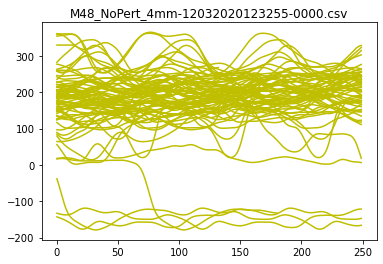

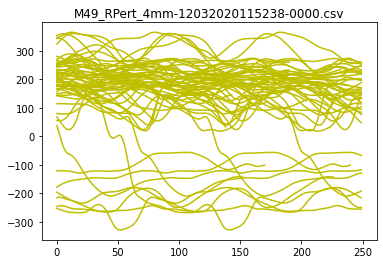

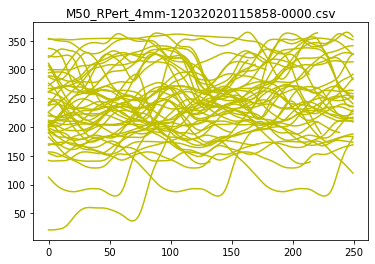

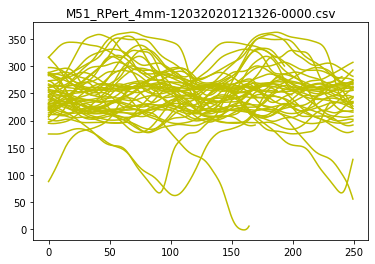

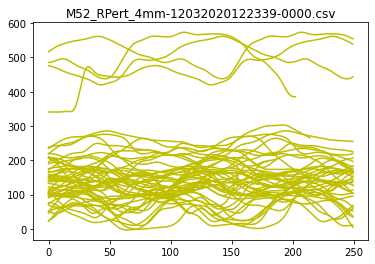

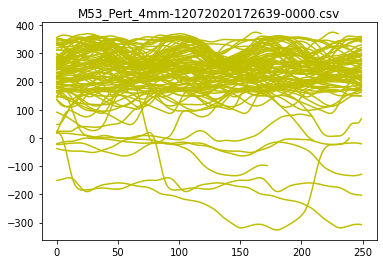

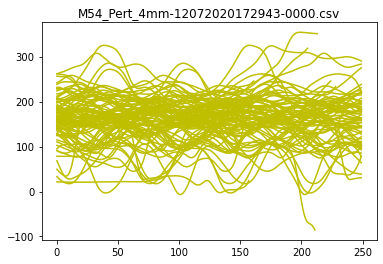

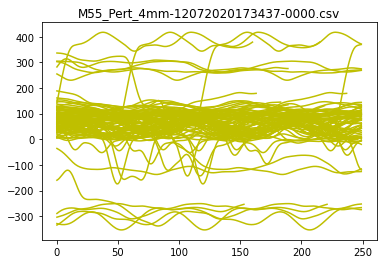

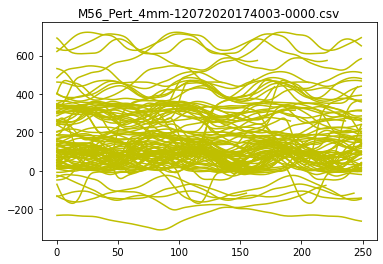

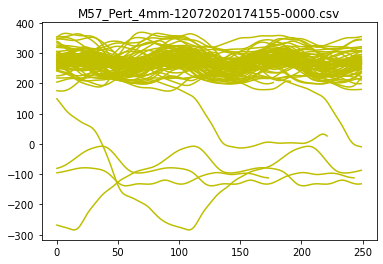

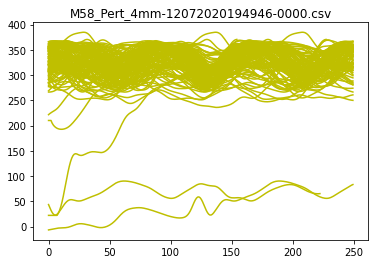

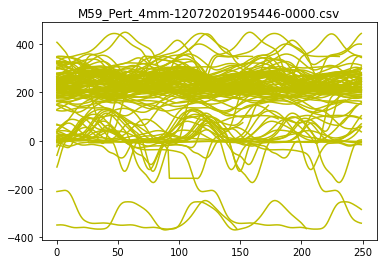

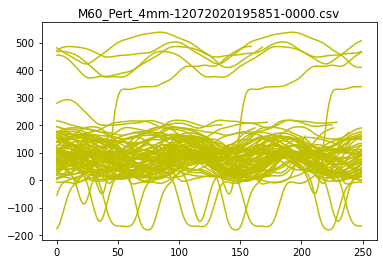

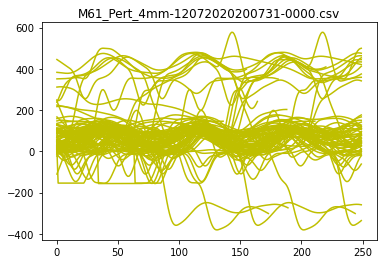

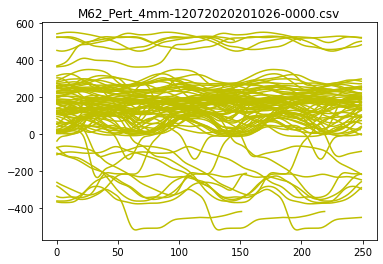

In [31]:
#PLOTS BEFORE PRE-PROCESS wrt R STEP
#Plot trials for a specific width where all trials from the same animal are plot in the same plot (tot 15 plots) 
MouseID_key = ['M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']

for i in np.arange(len(MouseID_key)):
    dict_ridge_Xwidth = dict_ridge_all['4mm']
    dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[i] in item[0], dict_ridge_Xwidth.items())) 
    values_list = list(dict_ridge_XwidthXmouseID.values())
    key_list = list(dict_ridge_XwidthXmouseID.keys()) 
#    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    fig = plt.figure()
    ax = fig.add_subplot(111)    
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][4]
        #print(TA_traj_wrt_step)
        for j in np.arange(len(TA_traj_wrt_step)):
            plt.plot(TA_traj_wrt_step[j] ,'y')
            plt.title("{i}".format(i = key_list[i]))
            #plt.ylim(200, 300)


<ipython-input-32-1d95b1330e64>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<Figure size 432x288 with 0 Axes>

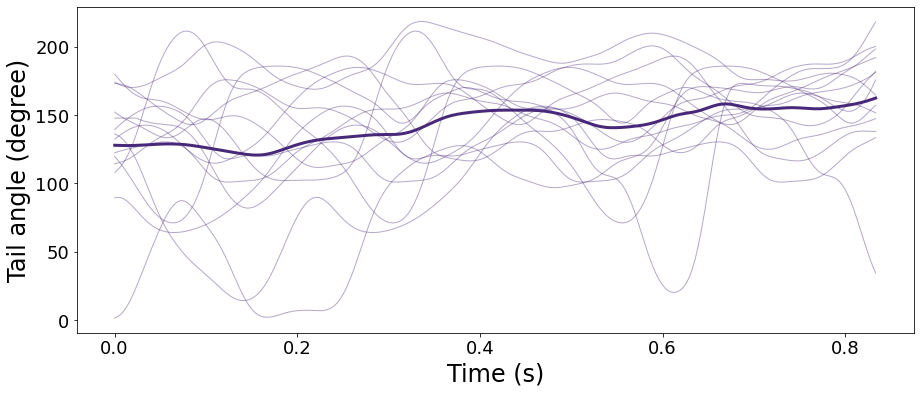

<Figure size 432x288 with 0 Axes>

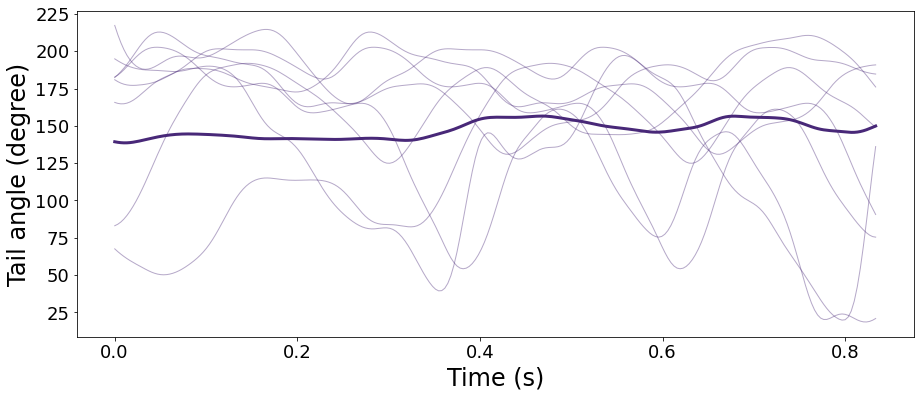

<Figure size 432x288 with 0 Axes>

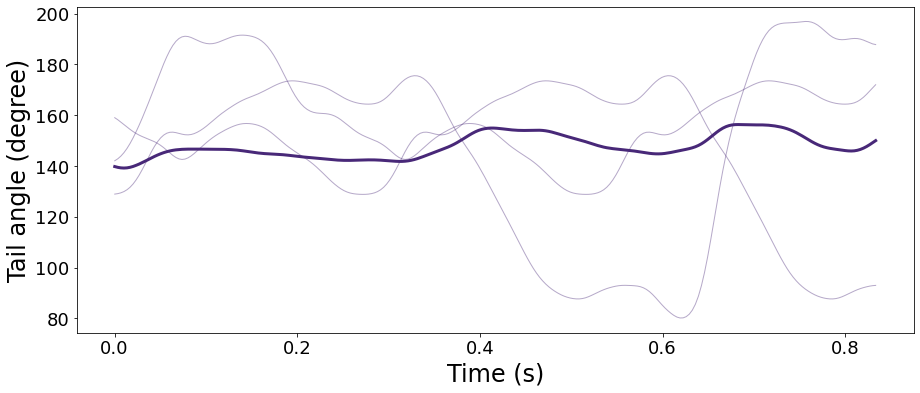

<Figure size 432x288 with 0 Axes>

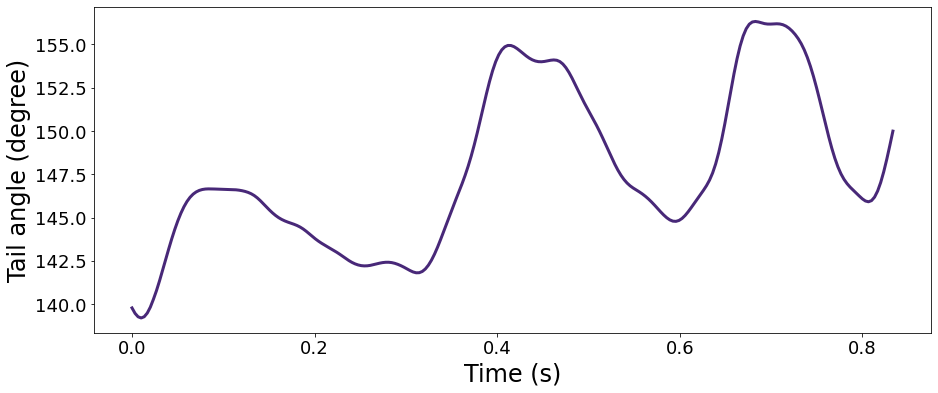

<Figure size 432x288 with 0 Axes>

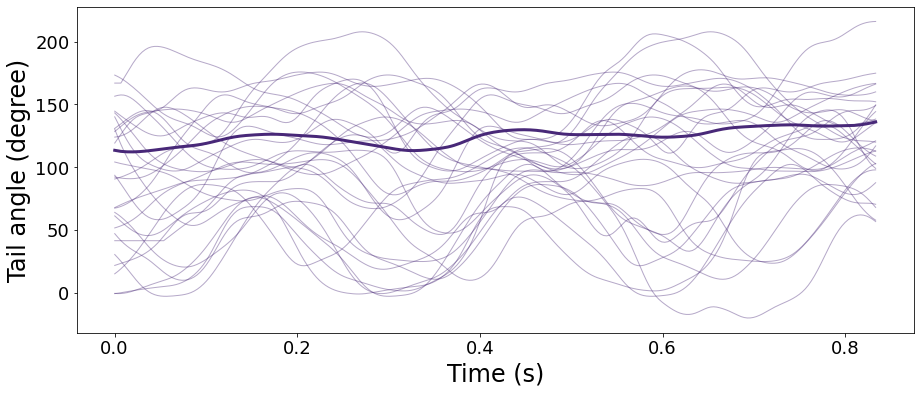

<Figure size 432x288 with 0 Axes>

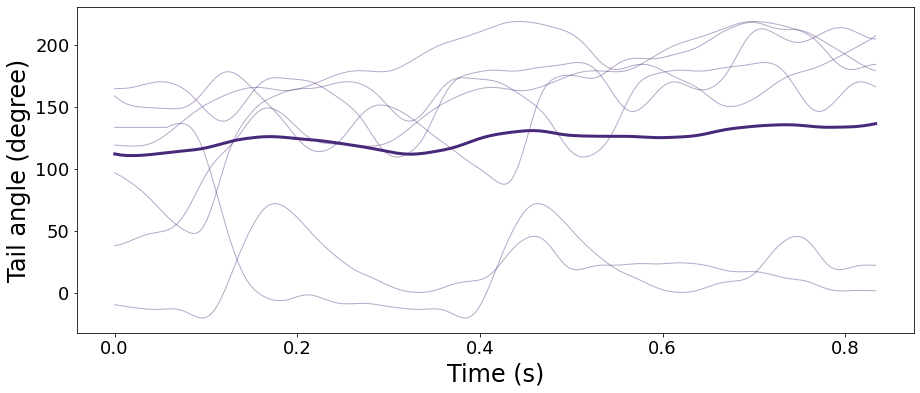

<Figure size 432x288 with 0 Axes>

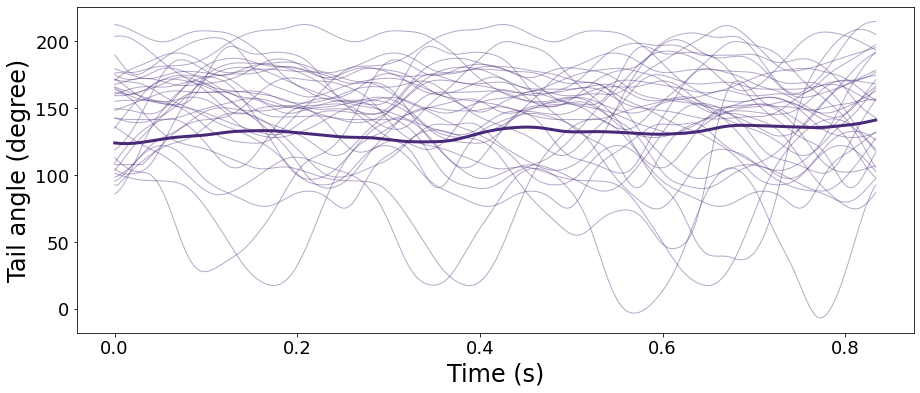

<Figure size 432x288 with 0 Axes>

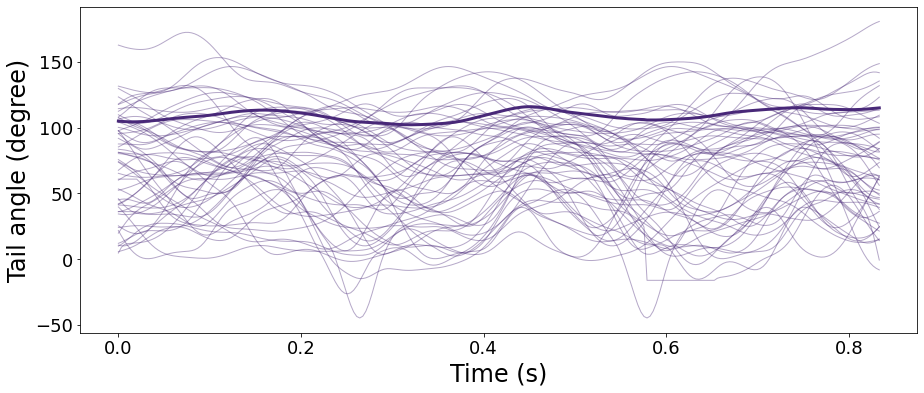

<Figure size 432x288 with 0 Axes>

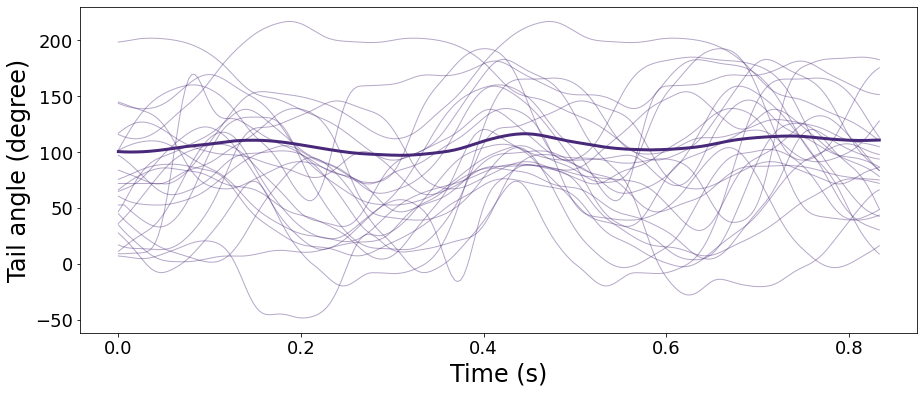

<Figure size 432x288 with 0 Axes>

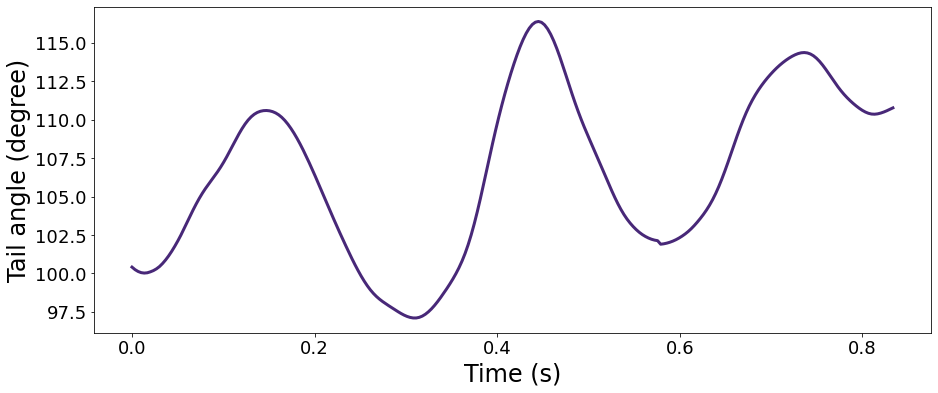

<Figure size 432x288 with 0 Axes>

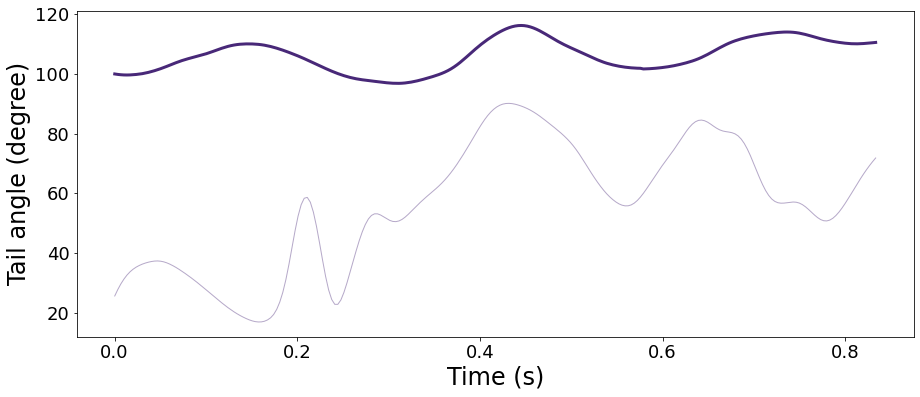

<Figure size 432x288 with 0 Axes>

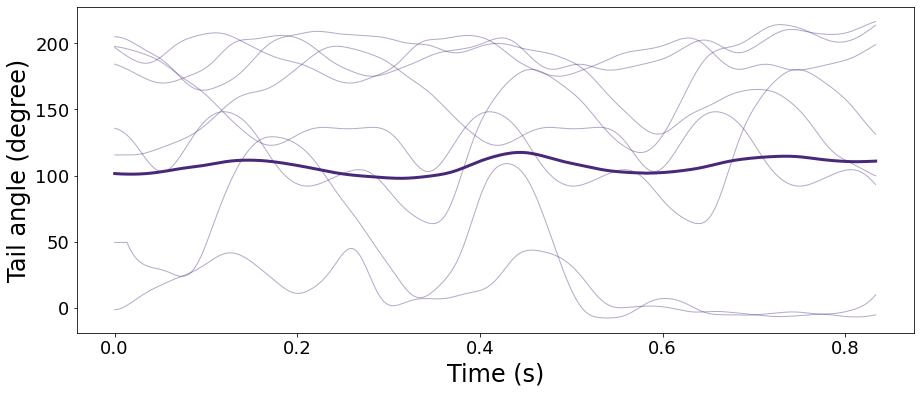

<Figure size 432x288 with 0 Axes>

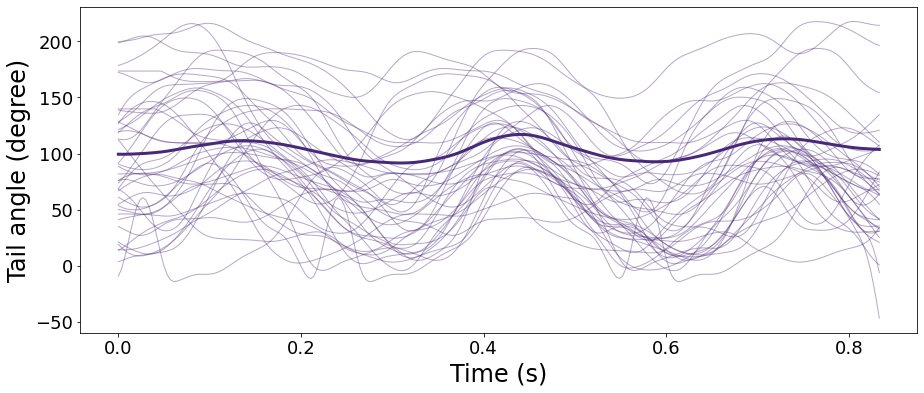

<Figure size 432x288 with 0 Axes>

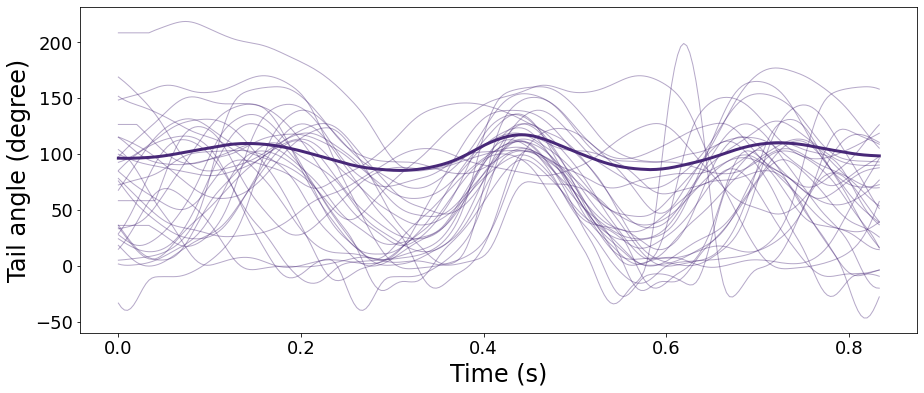

<Figure size 432x288 with 0 Axes>

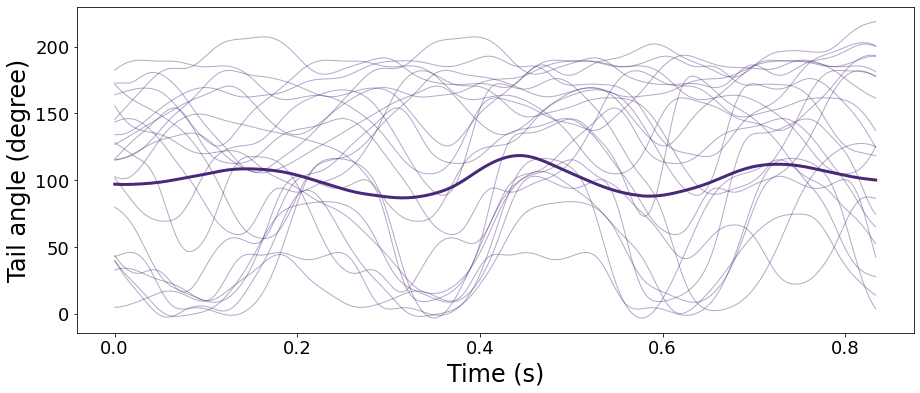

In [32]:
#################################################################PLOTS BEFORE PRE-PROCESS wrt L STEP
#Plot trials for a specific width where all trials from the same animal are plot in the same plot (tot 15 plots) 
MouseID_key = [ 'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
list_TA_traj = []
for i in np.arange(len(MouseID_key)):
    dict_ridge_Xwidth = dict_ridge_all['4mm']
    dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[i] in item[0], dict_ridge_Xwidth.items())) 
    values_list = list(dict_ridge_XwidthXmouseID.values())
    key_list = list(dict_ridge_XwidthXmouseID.keys()) 
#    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    fig = plt.figure()
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][6]
        clrs = sns.color_palette("viridis", n_colors=8) 
        for j in np.arange(len(TA_traj_wrt_step)):
            if all(TA_traj_wrt_step[j]<220) and all(TA_traj_wrt_step[j]>-50) and len(TA_traj_wrt_step[j])==250:
                x = np.linspace(0, 250/300, 250)
                ax1.plot(x, TA_traj_wrt_step[j] ,color=clrs[0], lw=1, alpha = 0.4)
                #plt.title("{i}".format(i = key_list[i]))
                #plt.ylim(200, 300)
                list_TA_traj.append(TA_traj_wrt_step[j])
    ax1.plot(x, np.nanmean(list_TA_traj, axis = 0), color=clrs[0], lw=3, alpha = 1)    
    ax1.set_xlabel('Time (s)', fontsize=24)
    ax1.set_ylabel('Tail angle (degree)', fontsize=24)
    ax1.tick_params(axis='both', which='major', labelsize=18) 
    fig.savefig('out.svg', format='svg', dpi=1200)

<ipython-input-63-3328dcc0c42e>:21: RuntimeWarning: Mean of empty slice
  ax1.plot(HA_traj_wrt_step[k]-np.nanmean(HA_traj_wrt_step[k]) ,color=clrs[0], lw=1, alpha = 0.4)
<ipython-input-63-3328dcc0c42e>:21: RuntimeWarning: Mean of empty slice
  ax1.plot(HA_traj_wrt_step[k]-np.nanmean(HA_traj_wrt_step[k]) ,color=clrs[0], lw=1, alpha = 0.4)
<ipython-input-63-3328dcc0c42e>:21: RuntimeWarning: Mean of empty slice
  ax1.plot(HA_traj_wrt_step[k]-np.nanmean(HA_traj_wrt_step[k]) ,color=clrs[0], lw=1, alpha = 0.4)
<ipython-input-63-3328dcc0c42e>:21: RuntimeWarning: Mean of empty slice
  ax1.plot(HA_traj_wrt_step[k]-np.nanmean(HA_traj_wrt_step[k]) ,color=clrs[0], lw=1, alpha = 0.4)
<ipython-input-63-3328dcc0c42e>:21: RuntimeWarning: Mean of empty slice
  ax1.plot(HA_traj_wrt_step[k]-np.nanmean(HA_traj_wrt_step[k]) ,color=clrs[0], lw=1, alpha = 0.4)
<ipython-input-63-3328dcc0c42e>:21: RuntimeWarning: Mean of empty slice
  ax1.plot(HA_traj_wrt_step[k]-np.nanmean(HA_traj_wrt_step[k]) ,color=clrs[0],

<Figure size 432x288 with 0 Axes>

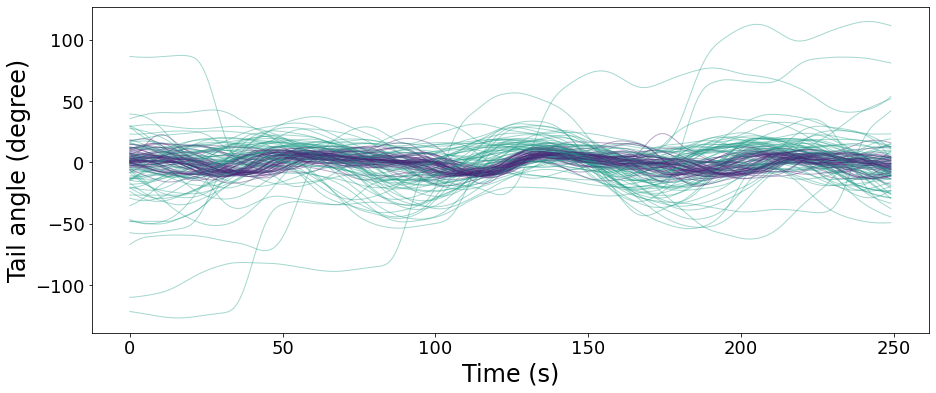

<Figure size 432x288 with 0 Axes>

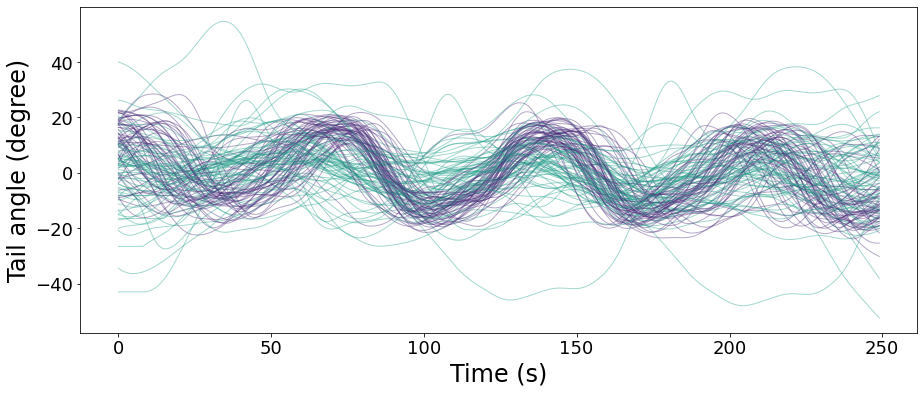

In [63]:
#################################################################PLOTS BEFORE PRE-PROCESS wrt L STEP
#Plot hips and tail to visually check they are anti-phase. Look at example M61
MouseID_key = [ 'M61', 'M62']#'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
list_TA_traj = []
for i in np.arange(len(MouseID_key)):
    dict_ridge_Xwidth = dict_ridge_all['8mm']
    dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[i] in item[0], dict_ridge_Xwidth.items())) 
    values_list = list(dict_ridge_XwidthXmouseID.values())
    key_list = list(dict_ridge_XwidthXmouseID.keys()) 
#    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    fig = plt.figure()
    fig, ax1 = plt.subplots(1, 1, figsize=(15,6))
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][6]
        HA_traj_wrt_step = values_list[i][12]
        clrs = sns.color_palette("viridis", n_colors=8) 
        for j, k in zip(np.arange(len(TA_traj_wrt_step)), np.arange(len(HA_traj_wrt_step))):
            if len(TA_traj_wrt_step[j])==250:# and len(HA_traj_wrt_step[j]) == len(TA_traj_wrt_step[j]):
                x = np.linspace(0, 250/300, 250)
                ax1.plot((TA_traj_wrt_step[j]-np.nanmean(TA_traj_wrt_step[j]))/2 ,color=clrs[4], lw=1, alpha = 0.4)
                ax1.plot(HA_traj_wrt_step[k]-np.nanmean(HA_traj_wrt_step[k]) ,color=clrs[0], lw=1, alpha = 0.4)
                #plt.title("{i}".format(i = key_list[i]))
                #plt.ylim(200, 300)
                list_TA_traj.append(TA_traj_wrt_step[j])
    #ax1.plot(x, np.nanmean(list_TA_traj, axis = 0), color=clrs[0], lw=3, alpha = 1)    
    ax1.set_xlabel('Time (s)', fontsize=24)
    ax1.set_ylabel('Tail angle (degree)', fontsize=24)
    ax1.tick_params(axis='both', which='major', labelsize=18) 
    fig.savefig('out.svg', format='svg', dpi=1200)

In [34]:
def excludeTA_outrange(TA):
    if any(i < -30 or i > 250 for i in TA):
        TA = []
    return TA

In [35]:

#####Compute PSTH no pert trial with mean trace for each mouse and each width


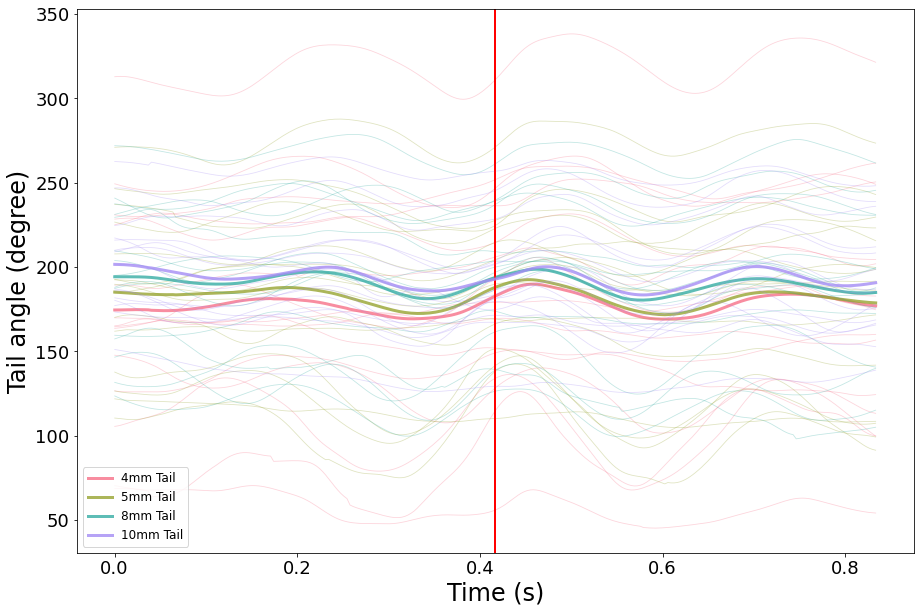

In [36]:
#################################################################PLOTS BEFORE PRE-PROCESS wrt L STEP
#Plot trials for a specific width where all trials from the same animal are plot in the same plot (tot 15 plots) 
search_key = ['4mm', '5mm', '8mm', '10mm']
MouseID_key = [ 'M48', 'M49', 'M50', 'M51', 'M52', 'M53', 'M54', 'M55', 'M56', 'M57', 'M58', 'M59', 'M60', 'M61', 'M62']
clrs = sns.color_palette("husl", 4)
label_strings = ['4mm Tail', '5mm Tail', '8mm Tail', '10mm Tail']



fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
for k in np.arange(len(search_key)):
    TA_mean_1_Mouse = []
    for i in np.arange(len(MouseID_key)):
        list_TA_traj = []
        dict_ridge_Xwidth = dict_ridge_all[search_key[k]]
        dict_ridge_XwidthXmouseID = dict(filter(lambda item: MouseID_key[i] in item[0], dict_ridge_Xwidth.items())) 
        values_list = list(dict_ridge_XwidthXmouseID.values())
        key_list = list(dict_ridge_XwidthXmouseID.keys()) 
        #fig, ax1 = plt.subplots(1, 1, figsize=(15,6))

        for i in np.arange(len(key_list)):
            TA_traj_wrt_step = values_list[i][6]
            #clrs = sns.color_palette("viridis", n_colors=8) 
            for j in np.arange(len(TA_traj_wrt_step)):
                if len(TA_traj_wrt_step[j])==250:#all(TA_traj_wrt_step[j]<220) and all(TA_traj_wrt_step[j]>-50) and len(TA_traj_wrt_step[j])==250:
                    list_TA_traj.append(TA_traj_wrt_step[j])
        ax1.plot(x, np.nanmean(list_TA_traj, axis = 0), c=clrs[k], lw=0.8, alpha = 0.3)
        TA_mean_1_Mouse.append(np.nanmean(list_TA_traj, axis = 0))
    #Plot mean across mice for 1 width
    ax1.axvline(125/300,0,360, color = 'red')
    ax1.plot(x, np.nanmean(TA_mean_1_Mouse, axis = 0), c=clrs[k], label = label_strings[k], lw=3, alpha = 0.8)
    ax1.legend(loc="lower left", prop={'size': 12})
    ax1.set_xlabel('Time (s)', fontsize=24)
    ax1.set_ylabel('Tail angle (degree)', fontsize=24)
    ax1.tick_params(axis='both', which='major', labelsize=18) 
    fig.savefig('nopertTA_allMiceallWidth.svg', format='svg', dpi=1200)

In [37]:
def compute_amlpit(vector):
    ampl = max(vector[92:132])-min(vector[92:132])
    return ampl

In [38]:
def return_Mean_STD_forPSTH(array_value_dict):
    mean_array = np.nanmean(array_value_dict, axis = 0)
    STD_array = stats.sem(array_value_dict, nan_policy='omit')
    return mean_array, STD_array

<ipython-input-39-14aa4dbfbebb>:38: RuntimeWarning: invalid value encountered in remainder
  wrapped_angle =  np.unwrap((COMX_traj_wrt_step[j][Hip_idx]+1800)%(360))
C:\Users\Salvo\anaconda3\lib\site-packages\numpy\lib\function_base.py:1540: RuntimeWarning: invalid value encountered in remainder
  ddmod = mod(dd + pi, 2*pi) - pi
<ipython-input-39-14aa4dbfbebb>:38: RuntimeWarning: invalid value encountered in remainder
  wrapped_angle =  np.unwrap((COMX_traj_wrt_step[j][Hip_idx]+1800)%(360))
C:\Users\Salvo\anaconda3\lib\site-packages\numpy\lib\function_base.py:1540: RuntimeWarning: invalid value encountered in remainder
  ddmod = mod(dd + pi, 2*pi) - pi


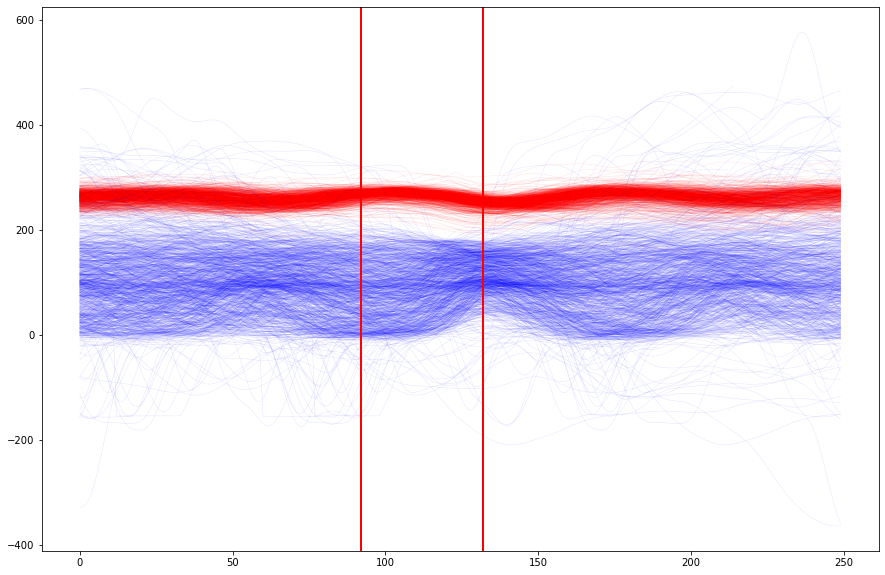

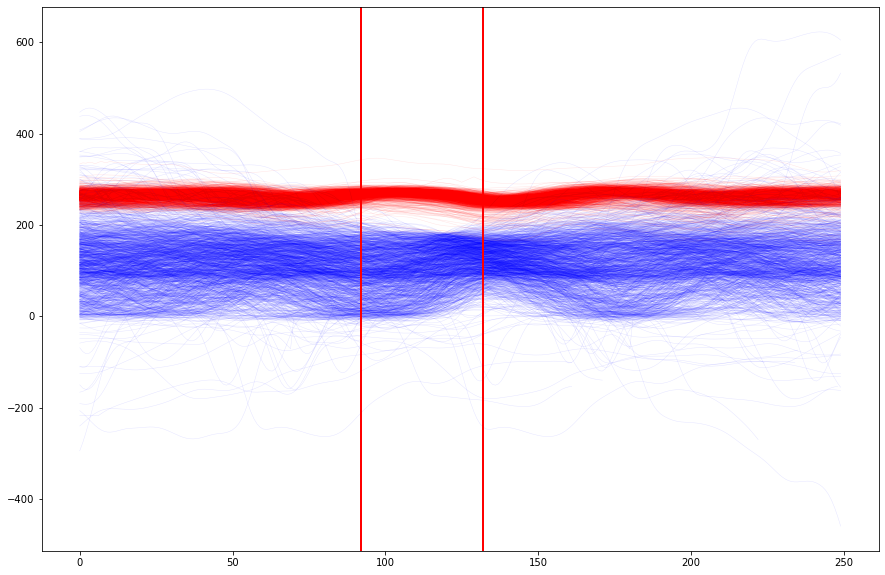

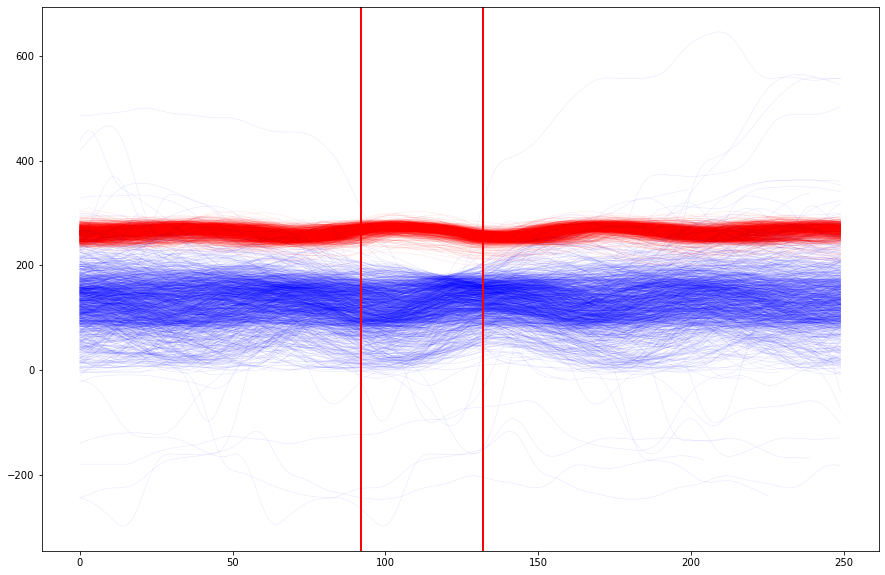

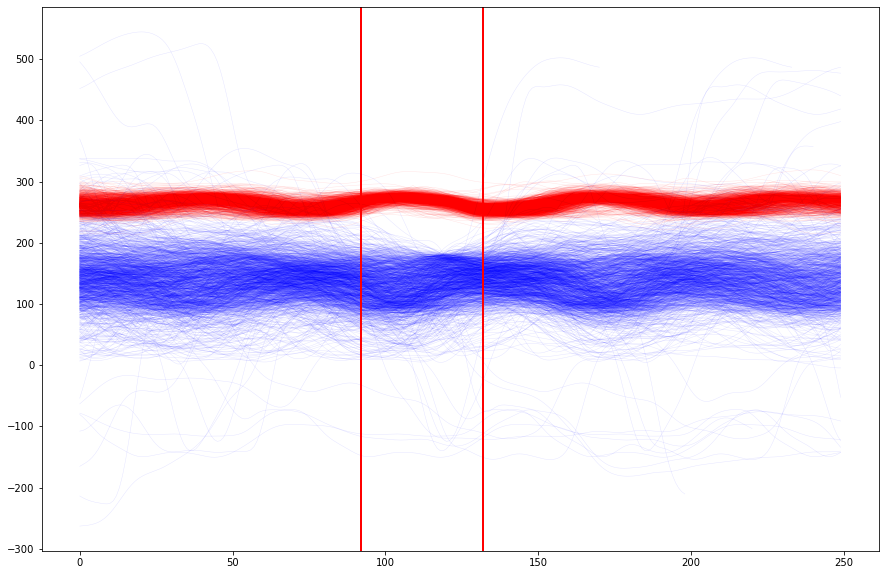

In [39]:
#### PLOT POST PROCESS
#Plot hips and tail angles for all trials, and compute amplitude of those arrays
search_key = ['4mm', '5mm', '8mm', '10mm']
#fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
clrs = sns.color_palette("husl", len(MouseID_key))
mean_big_list = []
std_big_list = []
mean_small_list = []
std_small_list = []
mean_combo_list = []
dict_TA_HA_ampl = defaultdict(dict)


for k in np.arange(len(search_key)):  
    fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
    TA_ampl_list = []
    HA_ampl_list = []
    dict_ridge_Xwidth = dict_preprocessed_all[search_key[k]]
    values_list = list(dict_ridge_Xwidth.values())
    key_list = list(dict_ridge_Xwidth.keys()) 
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][-1]
        COMX_traj_wrt_step = values_list[i][-1] 
        for j in np.arange(len(TA_traj_wrt_step)):
            ax1.axvline(92,0,360, color = 'red')
            ax1.axvline(132,0,360, color = 'red')

            Tail_idx = 7
            Hip_idx = 13
            Tail_idx1 = 0
            Tail_idx2 = 3
            if len(COMX_traj_wrt_step[j][Tail_idx]):# Plot Tail Angle trajectory
                plt.plot(COMX_traj_wrt_step[j][Tail_idx] ,color = 'b', lw=0.5, alpha = 0.1)
                if len(COMX_traj_wrt_step[j][Tail_idx]) == 250:
                    TA_ampl = compute_amlpit(COMX_traj_wrt_step[j][Tail_idx])
                    TA_ampl_list.append(TA_ampl)#Ampl TA
            if len(COMX_traj_wrt_step[j][Hip_idx]): #Plot Hip Angle trajectory
                wrapped_angle =  np.unwrap((COMX_traj_wrt_step[j][Hip_idx]+1800)%(360))
                plt.plot(wrapped_angle, color = 'r', lw=0.5, alpha = 0.1)
                if len(COMX_traj_wrt_step[j][Hip_idx]) == 250:
                    HA_ampl = compute_amlpit(wrapped_angle)
                    HA_ampl_list.append(HA_ampl)#Ampl Hips
    dict_TA_HA_ampl[search_key[k]] = HA_ampl_list#, HA_ampl_list]



In [40]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, ls_param, label_strings):
    clrs = sns.color_palette("husl", len(mean_array))
    #label_strings = ['4mm', '5mm', '8mm', '10mm']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']
#    _, ax = plt.subplots(figsize=(12, 8))

    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            x = np.linspace(0, 250/300, 250)
            ax.plot(x, mean_array[i], c=clrs[i], label = label_strings[i], ls = ls_param)
            ax.fill_between(x, mean_array[i]-std_array[i], mean_array[i]+std_array[i], \
                            alpha=0.3, facecolor=clrs[i])
            ax.legend(loc="lower left", prop={'size': 12})
            #ax.set_xlabel('Time (s)', fontsize=18)
            ax.set_ylabel('Angle (degree)', fontsize=18)
            #ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
            ax.tick_params(axis='both', which='major', labelsize=14) 
            ax.axvline(125/300,0,360, color = 'red')
            #ax.axvline(140,0,360, color = 'red')

    return ax


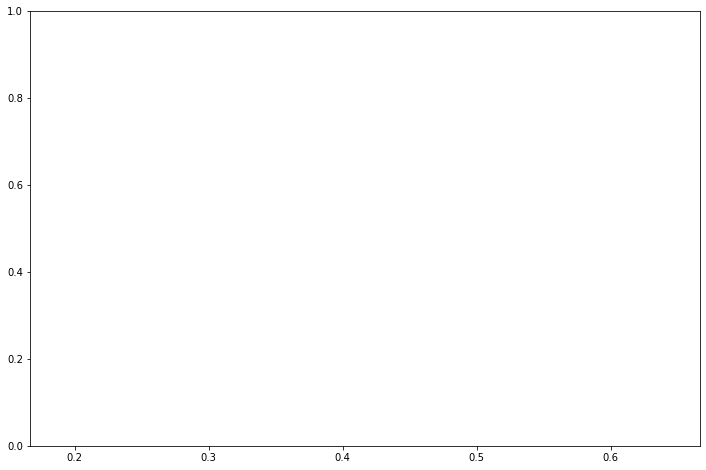

In [41]:
#CONTRA
_, ax = plt.subplots(figsize=(12, 8))
clrs = sns.color_palette("husl", 8)
label_strings_bl = ['4mm Hip', '5mm Hip', '8mm Hip', '10mm Hip']
label_strings_sl = ['4mm Tail', '5mm Tail', '8mm Tail', '10mm Tail']
ls_param_bl = '--'
ls_param_sl = '-'
ls_param_combo = 'dotted'
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_big_list, std_big_list, ax, ls_param_bl, label_strings_bl) 
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_small_list, std_small_list, ax, ls_param_sl, label_strings_sl)  
# plot_PSTH_Mean_STD_label_color_pre_assigned(mean_combo_list, \
#                                             std_small_list, ax, ls_param_combo, label_strings_sl)    

plt.xlim(50/300, 200/300)
 
plt.savefig('no_pert_AngMomPSTH.svg', format='svg', dpi=1200)


In [42]:
#####################################################################################################################

In [43]:
#Plot mean across all trials of TA and HA trajectory

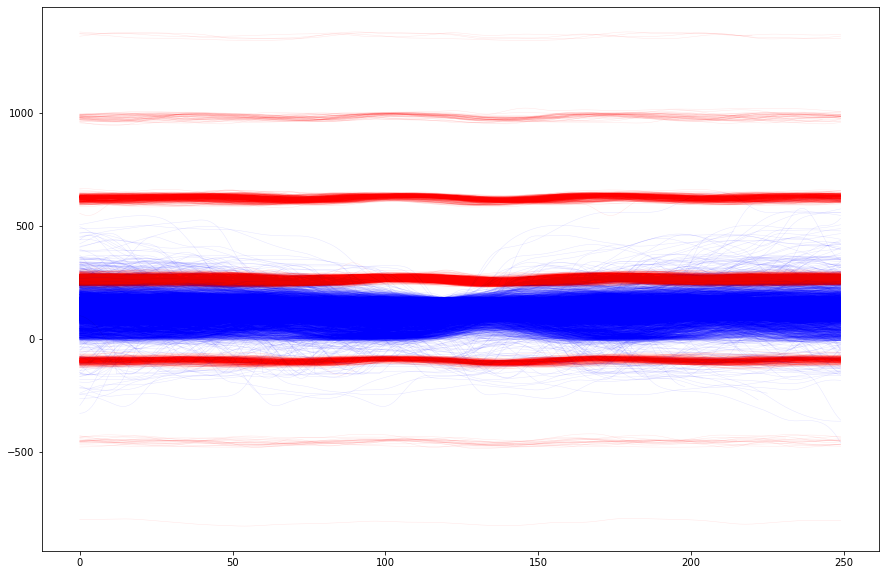

In [44]:
search_key = ['4mm', '5mm', '8mm', '10mm']
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
clrs = sns.color_palette("husl", len(MouseID_key))
mean_big_list = []
std_big_list = []
mean_small_list = []
std_small_list = []
mean_combo_list = []
TA_up_thresh = []
TA_below_thresh = []
a = 0
for k in np.arange(len(search_key)):    

    dict_ridge_Xwidth = dict_preprocessed_all[search_key[k]]
    values_list = list(dict_ridge_Xwidth.values())
    key_list = list(dict_ridge_Xwidth.keys()) 
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][-1]
        COMX_traj_wrt_step = values_list[i][-1] 
        #print(TA_traj_wrt_step)
        for j in np.arange(len(TA_traj_wrt_step)):
            Tail_idx = 7
            Hip_idx = 13
            Tail_idx1 = 0
            Tail_idx2 = 3
            if len(COMX_traj_wrt_step[j][Tail_idx]):# Plot Tail Angle trajectory
                a = a+1
                #print(a)
                plt.plot(COMX_traj_wrt_step[j][Tail_idx] ,color = 'b', lw=0.5, alpha = 0.1)
                #plt.ylim(-50,420)
                if len(COMX_traj_wrt_step[j][Tail_idx]) == 250:
                    TA_below_thresh.append(COMX_traj_wrt_step[j][Tail_idx]-COMX_traj_wrt_step[j][Tail_idx][100])#(np.diff(COMX_traj_wrt_step[j][Tail_idx]))*0.5*(1/3)*49)#Ang Mom TA
            if len(COMX_traj_wrt_step[j][Hip_idx]): #Plot Hip Angle trajectory
                plt.plot(COMX_traj_wrt_step[j][Hip_idx] ,color = 'r', lw=0.5, alpha = 0.1)
                if len(COMX_traj_wrt_step[j][Hip_idx]) == 250:
                    TA_up_thresh.append(COMX_traj_wrt_step[j][Hip_idx]-COMX_traj_wrt_step[j][Hip_idx][100])#(np.diff(COMX_traj_wrt_step[j][Hip_idx]))*10*0.5*4)#Ang Mom HA
mean_big, std_big = return_Mean_STD_forPSTH(TA_up_thresh)
mean_small, std_small = return_Mean_STD_forPSTH(TA_below_thresh)
mean_big_list.append(mean_big)
std_big_list.append(std_big)
mean_small_list.append(mean_small)
std_small_list.append(std_small)


In [45]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, ls_param, label_strings):
    clrs = sns.color_palette("husl", len(mean_array))
    #label_strings = ['4mm', '5mm', '8mm', '10mm']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']
#    _, ax = plt.subplots(figsize=(12, 8))

    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            x = np.linspace(0, 250/300, 250)
            ax.plot(x, mean_array[i], c='gray', label = label_strings[i], ls = ls_param)
            ax.fill_between(x, mean_array[i]-std_array[i], mean_array[i]+std_array[i], \
                            alpha=0.3, facecolor='gray')
            ax.legend(loc="lower left", prop={'size': 12})
            #ax.set_xlabel('Time (s)', fontsize=18)
            ax.set_ylabel('Angle (degree)', fontsize=18)
            #ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
            ax.tick_params(axis='both', which='major', labelsize=14) 
            ax.axvline(125/300,0,360, color = 'red')
            #ax.axvline(140,0,360, color = 'red')

    return ax


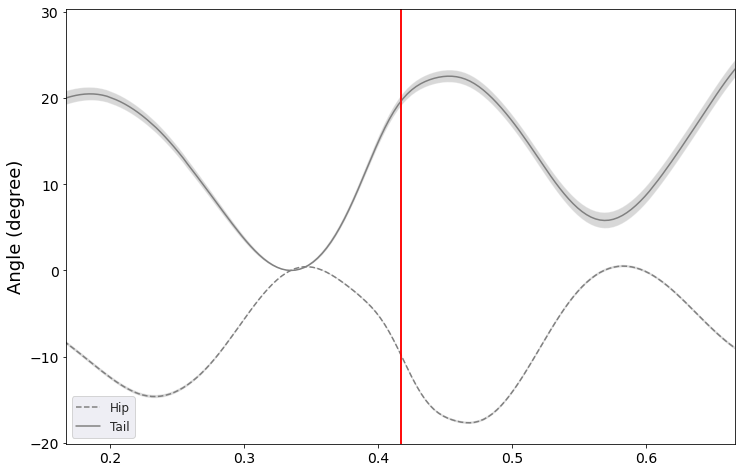

In [46]:
#CONTRA
_, ax = plt.subplots(figsize=(12, 8))
clrs = sns.color_palette('pastel', 9)
label_strings_bl = ['Hip']
label_strings_sl = ['Tail']
ls_param_bl = '--'
ls_param_sl = '-'
ls_param_combo = 'dotted'
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_big_list, std_big_list, ax, ls_param_bl, label_strings_bl) 
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_small_list, std_small_list, ax, ls_param_sl, label_strings_sl)  
# plot_PSTH_Mean_STD_label_color_pre_assigned(mean_combo_list, \
#                                             std_small_list, ax, ls_param_combo, label_strings_sl)    

plt.xlim(50/300, 200/300)
 
plt.savefig('no_pert_AngMomPSTH.svg', format='svg', dpi=1200)


In [47]:
#####################################################################################################################

In [48]:
#Plot mean across all trials of TA and HA angular momentum

3677 3677


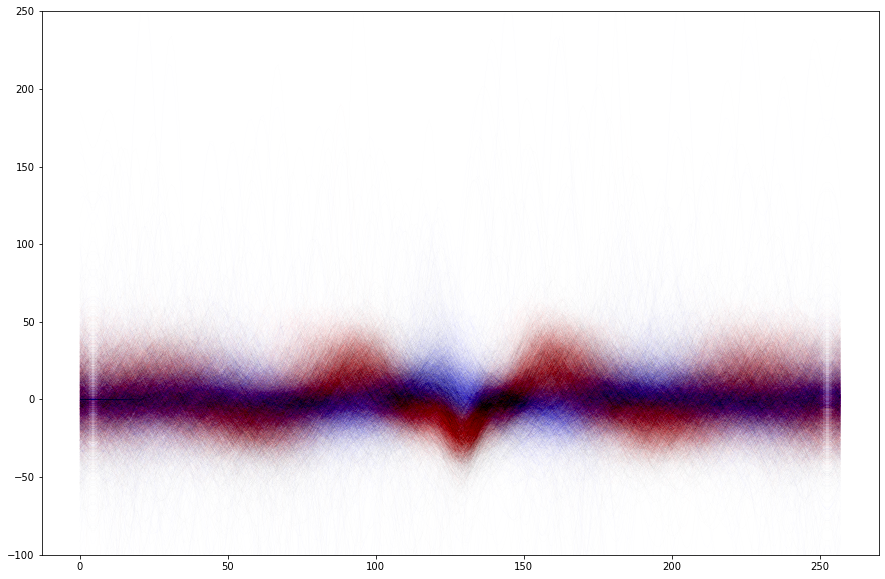

In [49]:
search_key = ['4mm', '5mm', '8mm', '10mm']
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
clrs = sns.color_palette("husl", len(MouseID_key))
mean_big_list = []
std_big_list = []
mean_small_list = []
std_small_list = []
mean_combo_list = []
TA_up_thresh = []
TA_below_thresh = []
cum_ta_ang_mom_list = []
cum_ha_ang_mom_list = []
AngMom_TA_and_HA = []
mean_combined_list = []
std_combined_list = []
a = 0
cum_ang_mom_dict = defaultdict(dict)

for k in np.arange(len(search_key)):    

    dict_ridge_Xwidth = dict_preprocessed_all[search_key[k]]
    values_list = list(dict_ridge_Xwidth.values())
    key_list = list(dict_ridge_Xwidth.keys()) 
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][-1]
        COMX_traj_wrt_step = values_list[i][-1] 
        #print(TA_traj_wrt_step)
        for j in np.arange(len(TA_traj_wrt_step)):
            Tail_idx = 7
            Hip_idx = 13
            Tail_idx1 = 0
            Tail_idx2 = 3
            if len(COMX_traj_wrt_step[j][Tail_idx]) and len(COMX_traj_wrt_step[j][Hip_idx]):# Plot Tail Angle trajectory
                ang_mom_ta = (smooth((np.diff(COMX_traj_wrt_step[j][Tail_idx]))*0.5*(1/3)*49, 10))
                ang_mom_ha = (smooth((np.diff(COMX_traj_wrt_step[j][Hip_idx]))*10*0.5*4, 10))

                #plt.ylim(-50,420)
                if len(COMX_traj_wrt_step[j][Tail_idx]) == 250 and len(COMX_traj_wrt_step[j][Hip_idx]) == 250:
                    TA_up_thresh.append(ang_mom_ha)#Ang Mom HA
                    cum_ha_ang_mom = np.trapz(abs(ang_mom_ha[90:150]))
                    cum_ha_ang_mom_list.append(cum_ha_ang_mom)
                    TA_below_thresh.append(ang_mom_ta)#Ang Mom TA
                    AngMom_TA_and_HA.append(ang_mom_ta+ang_mom_ha)#Ang Mom TA + HA                   
                    cum_ta_ang_mom = np.trapz(abs(ang_mom_ta[90:150])) #event btw 0.3-0.5 s
                    cum_ta_ang_mom_list.append(cum_ta_ang_mom)
                    #plot
                    plt.plot(ang_mom_ta ,color = 'b', lw=0.05, alpha = 0.1)
                    plt.plot(ang_mom_ha ,color = 'r', lw=0.05, alpha = 0.1)
                    plt.plot(ang_mom_ha+ang_mom_ta, color = 'k', lw=0.05, alpha = 0.1)

            plt.ylim(-100,250)
cum_ang_mom_dict['all'] = cum_ha_ang_mom_list#, cum_ta_ang_mom_list
print(len(cum_ta_ang_mom_list), len(cum_ha_ang_mom_list))
mean_big, std_big = return_Mean_STD_forPSTH(TA_up_thresh)
mean_small, std_small = return_Mean_STD_forPSTH(TA_below_thresh)
mean_combined, std_combined = return_Mean_STD_forPSTH(AngMom_TA_and_HA)
mean_big_list.append(mean_big)
std_big_list.append(std_big)
mean_small_list.append(mean_small)
std_small_list.append(std_small)
mean_combined_list.append(mean_combined)
std_combined_list.append(std_combined)

# cum_ta_ang_mom_list.append(cum_ta_ang_mom)
# cum_ha_ang_mom_list.append(cum_ha_ang_mom)

In [50]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, ls_param, label_strings, clr):
    clrs = sns.color_palette("husl", len(mean_array))
    #label_strings = ['4mm', '5mm', '8mm', '10mm']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']

    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            x = np.linspace(0, 250/300, 258)
            ax.plot(x, mean_array[i], c=clr, label = label_strings[i], ls = ls_param)
            ax.fill_between(x, mean_array[i]-std_array[i], mean_array[i]+std_array[i], \
                            alpha=0.3, facecolor=clr)
            ax.legend(loc="lower left", prop={'size': 12})
            #ax.set_xlabel('Time (s)', fontsize=18)
            ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
            ax.tick_params(axis='both', which='major', labelsize=14) 
            ax.axvline(92/300,0,360, color = 'gray', lw=0.2)
            ax.axvline(152/300,0,360, color = 'gray', lw=0.2)

    return ax


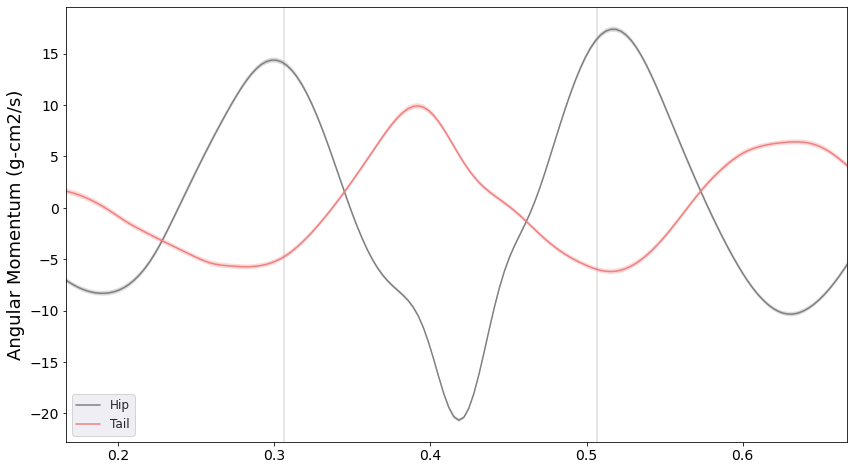

In [51]:
#CONTRA
_, ax = plt.subplots(figsize=(14, 8))
clrs = ['lightcoral', 'grey']
label_strings_bl = ['Hip']
label_strings_sl = ['Tail']
ls_param_bl = '-'
ls_param_sl = '-'
ls_param_combo = 'dotted'
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_big_list, std_big_list, ax, ls_param_bl, label_strings_bl, clrs[1]) 
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_small_list, std_small_list, ax, ls_param_sl, label_strings_sl, clrs[0])  
# plot_PSTH_Mean_STD_label_color_pre_assigned(mean_combo_list, \
#                                             std_small_list, ax, ls_param_combo, label_strings_sl)    

plt.xlim(50/300, 200/300)
 
plt.savefig('no_pert_AngMomPSTH.svg', format='svg', dpi=1200)


In [52]:
#### COMPUTE AND PLOT COMBINED TRACE FROM ABOVE SCRIPT

In [53]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, ls_param, label_strings, clr):
    clrs = sns.color_palette("husl", len(mean_array))
    #label_strings = ['4mm', '5mm', '8mm', '10mm']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']
#    _, ax = plt.subplots(figsize=(12, 8))

    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            x = np.linspace(0, 250, 258)
            ax.plot(x, mean_array[i], c=clr, label = label_strings[i], ls = ls_param)
            ax.fill_between(x, mean_array[i]-std_array[i], mean_array[i]+std_array[i], \
                            alpha=0.3, facecolor=clr)
            ax.legend(loc="lower left", prop={'size': 12})
            ax.set_xlabel('Time (s)', fontsize=18)
            ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
            ax.tick_params(axis='both', which='major', labelsize=14) 
            ax.axvline(125,0,360, color = 'red')
            #ax.axvline(140,0,360, color = 'red')

    return ax


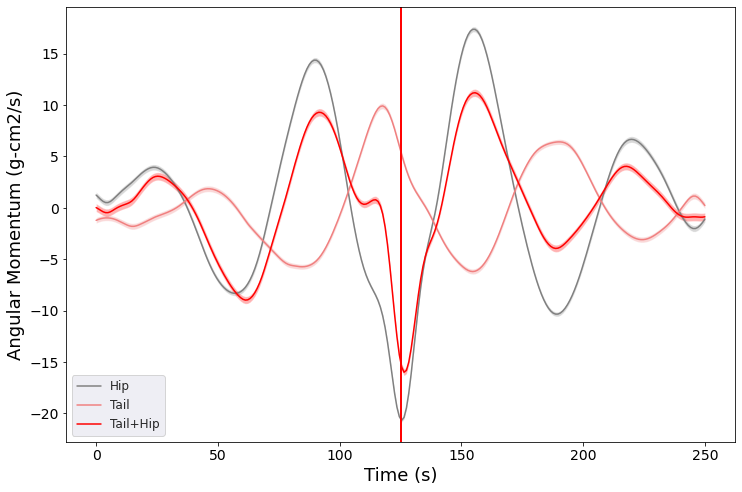

In [54]:
#plot combined trace as well
_, ax = plt.subplots(figsize=(12, 8))
clrs = ['lightcoral', 'grey', 'red']
label_strings_bl = ['Hip']
label_strings_sl = ['Tail']
label_strings_co = ['Tail+Hip']

ls_param_bl = '-'
ls_param_sl = '-'
ls_param_combo = 'dotted'
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_big_list, std_big_list, ax, ls_param_bl, label_strings_bl, clrs[1]) 
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_small_list, std_small_list, ax, ls_param_sl, label_strings_sl, clrs[0])
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_combined_list, std_combined_list, ax, ls_param_sl, label_strings_co, clrs[2]) 

# plot_PSTH_Mean_STD_label_color_pre_assigned(mean_combo_list, \
#                                             std_small_list, ax, ls_param_combo, label_strings_sl)    

#plt.xlim(50/300, 200/300)
 
plt.savefig('no_pert_AngMomPSTH.svg', format='svg', dpi=1200)


In [55]:
#Save values into dict

data = cum_ang_mom_dict
import pandas as pd

(pd.DataFrame.from_dict(data=data, orient='index')
   .to_csv('cum_ang_mom_dict.csv', header=False))

In [56]:
######################################################################################################################

In [57]:
def splitsequenceequally(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        array_to_append = seq[int(last):int(last + avg)]
        out.append(np.trapz(array_to_append))
        last += avg

    return out

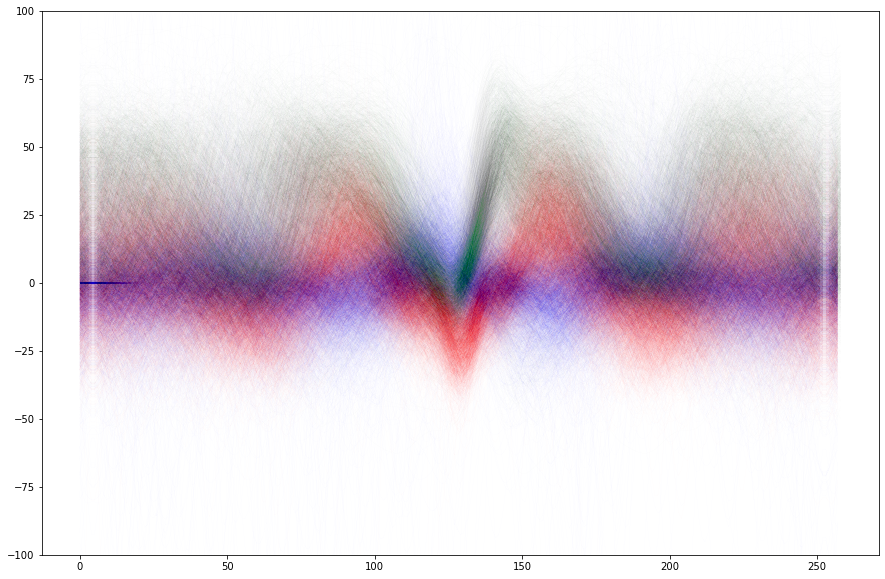

In [58]:
#Plot difference in ang mom between tail and hips wrt step cycle
search_key = ['4mm', '5mm', '8mm', '10mm']
fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
clrs = sns.color_palette("husl", len(MouseID_key))
mean_big_list = []
std_big_list = []
mean_small_list = []
std_small_list = []
mean_combo_list = []
TA_up_thresh = []
TA_below_thresh = []
cum_ta_ang_mom_list = []
cum_ha_ang_mom_list = []
AngMom_TA_and_HA = []
mean_combined_list = []
std_combined_list = []
Step_angle_list = []
mean_step_list = []
std_step_list = []
combo_split_mean_list = []
a = 0
cum_ang_mom_dict = defaultdict(dict)

for k in np.arange(len(search_key)):    

    dict_ridge_Xwidth = dict_preprocessed_all[search_key[k]]
    values_list = list(dict_ridge_Xwidth.values())
    key_list = list(dict_ridge_Xwidth.keys()) 
    for i in np.arange(len(key_list)):
        TA_traj_wrt_step = values_list[i][-1]
        COMX_traj_wrt_step = values_list[i][-1] 
        #print(TA_traj_wrt_step)
        for j in np.arange(len(TA_traj_wrt_step)):
            Tail_idx = 7
            Hip_idx = 13
            Tail_idx1 = 0
            Tail_idx2 = 3
            step_idx = 4 #step angle
            if len(COMX_traj_wrt_step[j][Tail_idx]) and len(COMX_traj_wrt_step[j][Hip_idx]):# Plot Tail Angle trajectory
                ang_mom_ta = (smooth((np.diff(COMX_traj_wrt_step[j][Tail_idx]))*0.5*(1/3)*49, 10))
                ang_mom_ha = (smooth((np.diff(COMX_traj_wrt_step[j][Hip_idx]))*10*0.5*4, 10))
                step_angle = smooth((COMX_traj_wrt_step[j][step_idx]), 10)
                #plt.ylim(-50,420)
                if len(COMX_traj_wrt_step[j][Tail_idx]) == 250 and len(COMX_traj_wrt_step[j][Hip_idx]) == 250:
                    TA_up_thresh.append(ang_mom_ha)#Ang Mom HA
                    cum_ha_ang_mom = np.trapz(abs(ang_mom_ha))
                    cum_ha_ang_mom_list.append(cum_ha_ang_mom)
                    TA_below_thresh.append(ang_mom_ta)#Ang Mom TA
                    AngMom_TA_and_HA.append(ang_mom_ta+ang_mom_ha)#Ang Mom TA + HA 
                    cum_ta_ang_mom = np.trapz(abs(ang_mom_ta)) #event btw 0.3-0.5 s
                    cum_ta_ang_mom_list.append(cum_ta_ang_mom)
                    #Get mean of array chunks equally split
                    combo_split_tail = np.array(splitsequenceequally(ang_mom_ta[92:152], 6))
                    combo_split_hip = np.array(splitsequenceequally(ang_mom_ha[92:152], 6))
                    combo_split_ratio = combo_split_hip+combo_split_tail #second
                    combo_split_mean_list.append(combo_split_ratio.tolist())
                    #plot
                    plt.plot(ang_mom_ta ,color = 'b', lw=0.05, alpha = 0.1)
                    plt.plot(ang_mom_ha ,color = 'r', lw=0.05, alpha = 0.1)
                    #plt.plot(ang_mom_ha+ang_mom_ta, color = 'k', lw=0.05, alpha = 0.1)
                    plt.plot(step_angle, color = 'g', lw=0.05, alpha = 0.1)
                    if len(COMX_traj_wrt_step[j][step_idx]) == 250: #make sure step array is full array
                        Step_angle_list.append(step_angle[0:258])#step angle                  


            plt.ylim(-100,100)
cum_ang_mom_dict['all'] = combo_split_mean_list#, cum_ta_ang_mom_list
mean_big, std_big = return_Mean_STD_forPSTH(TA_up_thresh)
mean_small, std_small = return_Mean_STD_forPSTH(TA_below_thresh)
mean_combined, std_combined = return_Mean_STD_forPSTH(AngMom_TA_and_HA)
mean_big_list.append(mean_big)
std_big_list.append(std_big)
mean_small_list.append(mean_small)
std_small_list.append(std_small)
mean_combined_list.append(mean_combined)
std_combined_list.append(std_combined)
mean_step, std_step = return_Mean_STD_forPSTH(Step_angle_list)
mean_step_list.append(mean_step)
std_step_list.append(std_step)

# cum_ta_ang_mom_list.append(cum_ta_ang_mom)
# cum_ha_ang_mom_list.append(cum_ha_ang_mom)

In [59]:
def plot_PSTH_Mean_STD_label_color_pre_assigned(mean_array, std_array, ax, ls_param, label_strings, clr):
    clrs = sns.color_palette("husl", len(mean_array))
    #label_strings = ['4mm', '5mm', '8mm', '10mm']#, 'Ipsi 4mm', 'Contra 4mm', 'Ipsi 4mm', 'Contra 4mm']
#    _, ax = plt.subplots(figsize=(12, 8))

    with sns.axes_style("darkgrid"):
        for i in range(len(mean_array)):
            epochs = list(range(len(mean_array[i])))
            x = np.linspace(0, 250/300, 258)
            ax.plot(x, mean_array[i], c=clr, label = label_strings[i], ls = ls_param)
            ax.fill_between(x, mean_array[i]-std_array[i], mean_array[i]+std_array[i], \
                            alpha=0.3, facecolor=clr)
            ax.legend(loc="lower left", prop={'size': 12})
            ax.set_xlabel('Time (s)', fontsize=18)
            ax.set_ylabel('Angular Momentum (g-cm2/s)', fontsize=18)
            ax.tick_params(axis='both', which='major', labelsize=14) 
#            ax.axvline(122/300,0,360, color = 'red')
            ax.axvline(92/300,0,360, color = 'gray', lw=0.2)
            ax.axvline(102/300,0,360, color = 'gray', lw=0.2)
            ax.axvline(112/300,0,360, color = 'gray', lw=0.2)
            ax.axvline(122/300,0,360, color = 'gray', lw=0.2)
            ax.axvline(132/300,0,360, color = 'gray', lw=0.2)
            ax.axvline(142/300,0,360, color = 'gray', lw=0.2)
            ax.axvline(152/300,0,360, color = 'gray', lw=0.2)

            #ax.axvline(140,0,360, color = 'red')

    return ax


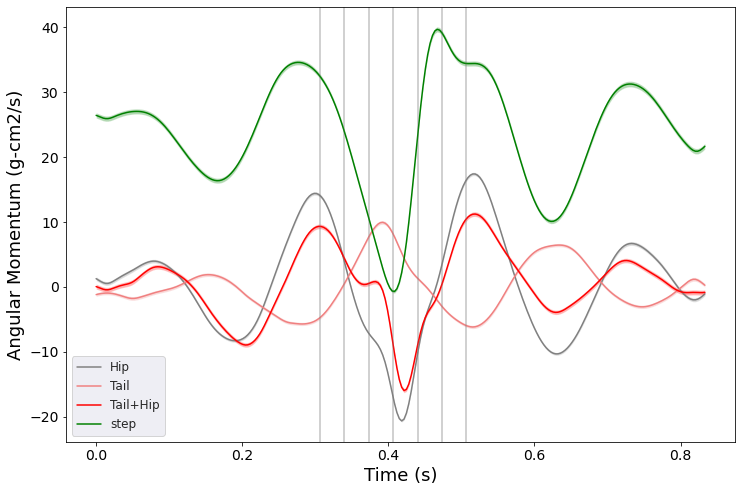

In [60]:
#plot combined trace as well
_, ax = plt.subplots(figsize=(12, 8))
clrs = ['lightcoral', 'grey', 'red', 'green']
label_strings_bl = ['Hip']
label_strings_sl = ['Tail']
label_strings_co = ['Tail+Hip']
label_strings_step = ['step']


ls_param_bl = '-'
ls_param_sl = '-'
ls_param_combo = 'dotted'
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_big_list, std_big_list, ax, ls_param_bl, label_strings_bl, clrs[1]) 
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_small_list, std_small_list, ax, ls_param_sl, label_strings_sl, clrs[0])
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_combined_list, std_combined_list, ax, ls_param_sl, label_strings_co, clrs[2]) 
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_step_list, std_step_list, ax, ls_param_sl, label_strings_step, clrs[3]) 

# plot_PSTH_Mean_STD_label_color_pre_assigned(mean_combo_list, \
#                                             std_small_list, ax, ls_param_combo, label_strings_sl)    

#plt.xlim(50/300, 200/300)
 
plt.savefig('no_pert_AngMomPSTH.svg', format='svg', dpi=1200)


In [61]:
def splitsequenceequally(seq, num):
    avg = len(seq) / float(num)
    out = []
    last = 0.0

    while last < len(seq):
        out.append(seq[int(last):int(last + avg)])
        last += avg

    return out

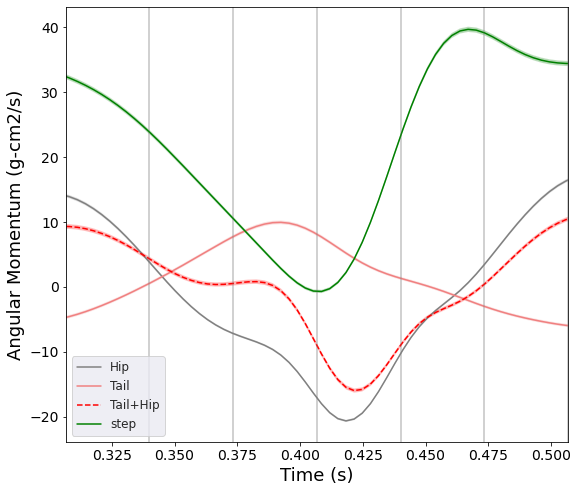

In [62]:
#plot combined trace as well
_, ax = plt.subplots(figsize=(9, 8))
clrs = ['lightcoral', 'grey', 'red', 'green']
label_strings_bl = ['Hip']
label_strings_sl = ['Tail']
label_strings_co = ['Tail+Hip']
label_strings_step = ['step']


ls_param_bl = '-'
ls_param_sl = '-'
ls_param_combo = '--'
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_big_list, std_big_list, ax, ls_param_bl, label_strings_bl, clrs[1]) 
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_small_list, std_small_list, ax, ls_param_sl, label_strings_sl, clrs[0])
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_combined_list, std_combined_list, ax, ls_param_combo, label_strings_co, clrs[2]) 
plot_PSTH_Mean_STD_label_color_pre_assigned(mean_step_list, std_step_list, ax, ls_param_sl, label_strings_step, clrs[3]) 

# plot_PSTH_Mean_STD_label_color_pre_assigned(mean_combo_list, \
#                                             std_small_list, ax, ls_param_combo, label_strings_sl)    

plt.xlim(92/300, 152/300)
 
plt.savefig('no_pert_AngMomPSTH.svg', format='svg', dpi=1200)
